In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

# Data Variables

Two data files are available *Erlenbach_ion_concentration.csv* and *Erlenbach_probe_data10min.csv*.

## ion concentration dataset

This first dataset, *Erlenbach_ion_concentration.csv*, lists ion concentration measured from water samples. Missing values are indicated as NA.
The data consists of the following columns: 

 |Column|Unit &nbsp; |Description|
 |------|------------|:----------|
 |`date`|-|date of sampling|
 |`Na`|[mg/l]|**Sodium** concentration from **ion chromatography**|
 |`Mg`|[mg/l]|**Magnesium** concentration from **ion chromatography**|
 |`K`|[mg/l]|**Potassium** concentration from **ion chromatography**|
 |`Ca`|[mg/l]|**Calcium** concentration from **ion chromatography**|
 |`Cl`|[mg/l]|**Chlorine** concentration from **ion chromatography**|
 |`NO3`|[mg/l]|**Nitrate** concentration from **ion chromatography**|
 |`SO4`|[mg/l]|**Sulfate** concentration from **ion chromatography**|
 |`Na_MS`|[ug/l]|**Sodium** concentration from **mass spectometry**|
 |`K_MS`|[ug/l]|**Potassium** concentration from **mass spectometry**|
 |`Ca_MS`|[ug/l]|**Calcium** concentration from **mass spectometry**|
 |`comments_IC`|-|Comments on ion chromatography values|
 |`comments_MS`|-|Comments on mass spectometry values|


In [ ]:
DATA_PATH = '/content/drive/MyDrive/ML/Project 2/data/'
ion_concentration = pd.read_csv(DATA_PATH + 'Erlenbach_ion_concentration.csv', parse_dates=[0], infer_datetime_format=True)
ion_concentration.head()

,date,Na,Mg,K,Ca,Cl,NO3,SO4,Na_MS,Mg_MS,K_MS,Ca_MS,comments_IC,comments_MS
0,2017-03-06 17:20:00,3.232,4.209,NaN,64.711,NaN,1.751,17.637,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-06 18:20:00,3.268,4.241,1.112,64.043,0.559,1.771,17.740,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-06 19:20:00,NaN,NaN,NaN,NaN,0.563,1.788,17.457,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-06 21:20:00,3.154,4.194,1.101,63.400,0.571,1.779,17.433,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-06 22:20:00,3.162,4.238,NaN,63.785,0.572,1.815,16.462,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("The ion concentration dataframe has", ion_concentration.shape[0], "rows and", ion_concentration.shape[1], "columns.")

The ion concentration dataframe has 19095 rows and 14 columns.


## 10 min samples dataset

The second dataset, (*Erlenbach_probe_data10min.csv*), includes quasi-continuous data measured from in-situ probes. The data comes from 2 main probe types, here called WSL and SCAN.

**common to both probe types**

|Column|Description|
|------|:-----------|
|`date`|date of sampling|

 **data from WSL probe**

|Column|Unit &nbsp; &nbsp; |Description|
|------|-------------------|:----------|
|`precipitation`|[mm/10min]|-|
|`water_temperature`|[°C]|-|
|`water_electrical_conductivity`|[uS/cm]|-|
|`flow`|[mm/10min]|-|
|`Comments_WSLdata`|-|comments|

**data from SCAN probe**

|Column|Unit &nbsp; &nbsp; |Description|
|------|-------------------|:----------|
|`turbidity`|[FTUeq]|-|
|`NO3-Neq`|[mg/l]|-|
|`TOCeq`|[mg/l]|-|
|`DOCeq`|[mg/l]|-|
|`dissolved_oxygen`|[ppm]|-|
|`temperature_DO`|[°C]|-|
|`conductivity`|[uS/cm]|-|
|`temperature_EC`|[°C]|-|
|`pH`|[pH]|-|
|`ORP`|[mV]|-|
|`comments_SCANdata`|-|comments|

**other derived data**

|Column|Unit &nbsp; &nbsp; |Description|
|------|-------------------|:----------|
|`dQ/dt`|-|variation of discharge over the time interval|

In [ ]:
probe_data10min = pd.read_csv(DATA_PATH + 'Erlenbach_probe_data10min.csv', parse_dates=[0], infer_datetime_format=True)
probe_data10min.columns

Index(['DATE_TIME_UTC+1', 'NS_mm/10min', 'WT_dC', 'LF_uS/cm', 'Qu_mm/10min',
       'Comments_WSLdata',
       'Turbidity - Clean value [FTUeq] (Limit:0.00-150.00)',
       'NO3-Neq - Clean value [mg/l] (Limit:0.00-15.00)',
       'TOCeq - Clean value [mg/l] (Limit:0.00-20.00)',
       'DOCeq - Clean value [mg/l] (Limit:0.00-15.00)',
       'Dissolved Oxygen - Clean value [ppm] (Limit:0.00-25.00)',
       'Temperature DO - Clean value [°C] (Limit:0.00-50.00)',
       'Conductivity - Clean value [uS/cm] (Limit:0.10-600000.00)',
       'Temperature EC - Clean value [°C] (Limit:-20.00-130.00)',
       'pH - Clean value (Limit:0.00-14.00)',
       'ORP - Clean value [mV] (Limit:-2000.00-2000.00)', 'Comments_SCANdata',
       'dQ/dt'],
      dtype='object')

In [ ]:
# rename columns
column_names = {'DATE_TIME_UTC+1':'date', 'NS_mm/10min':'precipitation', 'WT_dC':'water_temperature', 'LF_uS/cm': 'water_electrical_conductivity', 
                'Qu_mm/10min': 'flow', 'Comments_WSLdata' : 'comments_WSLdata',  'Turbidity - Clean value [FTUeq] (Limit:0.00-150.00)': 'turbidity',
                'NO3-Neq - Clean value [mg/l] (Limit:0.00-15.00)': 'NO3-Neq', 'TOCeq - Clean value [mg/l] (Limit:0.00-20.00)' : 'TOCeq',
                'DOCeq - Clean value [mg/l] (Limit:0.00-15.00)' : 'DOCeq', 'Dissolved Oxygen - Clean value [ppm] (Limit:0.00-25.00)' : 'dissolved_oxygen',
                'Temperature DO - Clean value [°C] (Limit:0.00-50.00)' : 'temperature_DO', 
                'Conductivity - Clean value [uS/cm] (Limit:0.10-600000.00)' : 'conductivity', 
                'Temperature EC - Clean value [°C] (Limit:-20.00-130.00)': "temperature_EC", 'pH - Clean value (Limit:0.00-14.00)' : 'pH',
                'ORP - Clean value [mV] (Limit:-2000.00-2000.00)' : 'ORP', 'Comments_SCANdata' : 'comments_SCANdata'
                }

probe_data10min.rename(columns=column_names, inplace=True)
probe_data10min.head()

,date,precipitation,water_temperature,water_electrical_conductivity,flow,comments_WSLdata,turbidity,NO3-Neq,TOCeq,DOCeq,dissolved_oxygen,temperature_DO,conductivity,temperature_EC,pH,ORP,comments_SCANdata,dQ/dt
0,2016-08-30 00:00:00,0.0,14.2,259.0,0.007371,NaN,5.78,1.50,5.59,3.54,7.74,16.8,262.0,15.9,8.17,368.0,NaN,0.000171
1,2016-08-30 00:10:00,0.0,14.0,259.8,0.007200,NaN,5.57,1.50,5.56,3.53,7.75,16.8,262.0,15.9,8.16,368.0,NaN,-0.000171
2,2016-08-30 00:20:00,0.0,14.1,260.1,0.007200,NaN,5.37,1.50,5.53,3.53,7.75,16.7,262.0,15.9,8.16,369.0,NaN,0.000000
3,2016-08-30 00:30:00,0.0,14.1,260.8,0.007200,NaN,5.56,1.50,5.52,3.52,7.73,16.7,262.0,15.9,8.17,369.0,NaN,0.000000
4,2016-08-30 00:40:00,0.0,14.0,261.1,0.007029,NaN,6.21,1.49,5.53,3.50,7.72,16.7,263.0,15.8,8.17,370.0,NaN,-0.000171


In [ ]:
print("The probe dataframe has", probe_data10min.shape[0], "rows and", probe_data10min.shape[1], "columns.")

The probe dataframe has 210086 rows and 18 columns.


# Preprocessing

## NaN Values

The number of missing values greatly affects the performance of a machine learning model. Let's count the number of them present in our two dataset.

### Ion concentration dataset

In [ ]:
# NaN values per column
nan_per_column = ion_concentration.isna().sum().reset_index(name='Nr NaNs')
nan_per_column['percentage'] = np.round(nan_per_column['Nr NaNs'] / ion_concentration.shape[0] * 100)
nan_per_column

,index,Nr NaNs,percentage
0,date,0,0.0
1,Na,4531,24.0
2,Mg,5920,31.0
3,K,5028,26.0
4,Ca,4572,24.0
5,Cl,5842,31.0
6,NO3,6142,32.0
7,SO4,4538,24.0
8,Na_MS,8854,46.0
9,Mg_MS,8757,46.0


For Na, Mc, K and Ca, there are two measurements available (ion chromatrography and mass spectrometry). The ion chromatography is to be preferred, but mass spectrometry can be useful to fill some gaps.

### 10 min samples dataset

In [ ]:
# NaN values per column
nan_per_column = probe_data10min.isna().sum().reset_index(name='Nr NaNs')
nan_per_column['percentage'] = np.round(nan_per_column['Nr NaNs'] / probe_data10min.shape[0] * 100)
nan_per_column

,index,Nr NaNs,percentage
0,date,0,0.0
1,precipitation,175,0.0
2,water_temperature,175,0.0
3,water_electrical_conductivity,1697,1.0
4,flow,175,0.0
5,comments_WSLdata,210086,100.0
6,turbidity,33489,16.0
7,NO3-Neq,36257,17.0
8,TOCeq,33447,16.0
9,DOCeq,33319,16.0


## Drop duplicated rows

### Ion concentration dataset

We first remove purely duplicated rows (ie. rows for which all the elements are duplicated)

In [ ]:
# Remove duplicated rows
print(len(ion_concentration[ion_concentration.duplicated(keep=False)]))
ion_concentration = ion_concentration.drop_duplicates(keep='first')
print(len(ion_concentration[ion_concentration.duplicated(keep=False)]))

83
0


We now consider rows that were measured at the same time but with different column values.

In [ ]:
# We still have duplications according to date
ion_conc_date_dup = ion_concentration[ion_concentration.duplicated(subset=['date'], keep=False)]
ion_conc_date_dup.head()

,date,Na,Mg,K,Ca,Cl,NO3,SO4,Na_MS,Mg_MS,K_MS,Ca_MS,comments_IC,comments_MS
376,2017-03-24 05:30:00,2.064,3.388,1.055,53.260,0.357,1.067,10.569,NaN,NaN,NaN,NaN,NaN,NaN
378,2017-03-24 05:30:00,2.064,3.388,1.055,53.260,0.357,1.067,10.569,976.173,1582.534,551.312,22760.514,NaN,NaN
383,2017-03-24 07:30:00,2.106,3.440,1.071,54.193,0.362,1.061,10.862,NaN,NaN,NaN,NaN,NaN,NaN
385,2017-03-24 07:30:00,2.106,3.440,1.071,54.193,0.362,1.061,10.862,995.220,1606.713,536.804,23661.226,NaN,NaN
1071,2017-04-11 19:10:00,1.814,2.384,0.758,35.558,0.321,1.707,6.481,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# observe that for each duplicated timestamp we have exactly two duplications (not more)
(ion_conc_date_dup.date.groupby(ion_conc_date_dup.date).count() != 2).any()

False

We observe that we have each time no more than two duplicted elements according to time. This simplifies the selection and we decided, for each pair of duplications, to remove the row containing more NaN values.

In [ ]:
ion_concentration['count_nan'] = ion_concentration.isna().sum(axis=1)
ion_concentration = ion_concentration.sort_values(by='count_nan') \
                    .drop_duplicates(subset=['date'], keep='first') \
                    .drop(['count_nan'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# There is no more duplications according to date
len(ion_concentration[ion_concentration.duplicated(keep=False)])

0

In [ ]:
print(len(ion_concentration))

19003


We do a small sanity check: previously there were two rows for timestamp `2017-03-24 05:30:00`. One row had his columns `Na_MS`, `Mg_MS`, `K_MS` and `Ca_MS` defined, the other contained only missing values for those columns. We check that only the first one was kept:

In [ ]:
# Sanity check : for the previously duplicated dates, the one with less NaN values is kept
ion_concentration[ion_concentration['date'] == '2017-03-24 05:30:00']

,date,Na,Mg,K,Ca,Cl,NO3,SO4,Na_MS,Mg_MS,K_MS,Ca_MS,comments_IC,comments_MS
378,2017-03-24 05:30:00,2.064,3.388,1.055,53.26,0.357,1.067,10.569,976.173,1582.534,551.312,22760.514,NaN,NaN


### 10 min samples dataset

As before, we first remove purely duplicated rows (ie. rows for which all the elements are duplicated)

In [ ]:
# Remove purely duplicated rows
print(len(probe_data10min[probe_data10min.duplicated(keep=False)]))
probe_data10min = probe_data10min.drop_duplicates(keep='first')
print(len(probe_data10min[probe_data10min.duplicated(keep=False)]))

2
0


We observe that `probe_data10min` doesn't contain duplications according to date.

In [ ]:
# Duplications according to date
print(len(probe_data10min[probe_data10min.duplicated(subset=['date'], keep=False)]))

0


In [ ]:
print(len(probe_data10min))

210085


## Dataset indexes

Now that we ensured that our datasets don't contain any duplications based on the `date` feature, a row now can be defined by it's sampling date. It will be useful to refer to a sample using it's `date` value, so let's set `date` as the index. 

In [ ]:
# ion_concentration dataset : set date as index
ion_concentration.set_index('date', inplace=True)
ion_concentration.sort_index(inplace=True)

In [ ]:
# 10 min samples dataset : set date as index
probe_data10min.set_index('date', inplace=True)
probe_data10min.sort_index(inplace=True)

## Features evolution over time

Let's see how the features evolve over time.


We define a function to plot the evolution of features over time for either the ion concentration dataset or the 10 min samples dataset.

In [ ]:
ion_cols = ['Na', 'Mg', 'K', 'Ca', 'Cl', 'NO3', 'SO4', 'Na_MS', 'Mg_MS', 'K_MS', 'Ca_MS']

probe_10min_cols = ['precipitation', 'water_temperature', 'water_electrical_conductivity', 'flow', 'turbidity', 'NO3-Neq', 'TOCeq', 'DOCeq',
                   'dissolved_oxygen', 'temperature_DO', 'conductivity', 'temperature_EC', 'pH', 'ORP', 'dQ/dt']

def plot_features_evolution(ion_conc, start_date, end_date, cols=False, style='.'):
  """ plot the evolution of the features between start_date and end_date
      (for either ion_concentration or probe_data10min dataset) """
 
  # df and columns to plot depend on ion_conc parameter
  df_to_plot = ion_concentration if ion_conc else probe_data10min
  columns_to_plot = ion_cols if ion_conc else probe_10min_cols
  if cols != False:
    columns_to_plot = cols

  rows = int(np.ceil(len(columns_to_plot)/3))
  cols = 3
  fig, axes = plt.subplots(rows, cols, figsize=(30,25))

  for i in range(rows):
    for j in range(cols):
      # plot nothing if out of range
      if (i*cols + j) >= len(columns_to_plot):
        break
      # column to plot
      column = columns_to_plot[(i*cols + j)]
      # plot respective column from start_date to end_date
      df_to_plot[start_date : end_date ][column].plot(ax=axes[i,j], style=style)
      #title
      axes[i,j].set_title(column)

  plt.tight_layout()
  plt.show()


### Global visualization

Let's first visualize the evolution of the features over the entire duration spanned by our two datasets.

**Ion concentration dataset:**

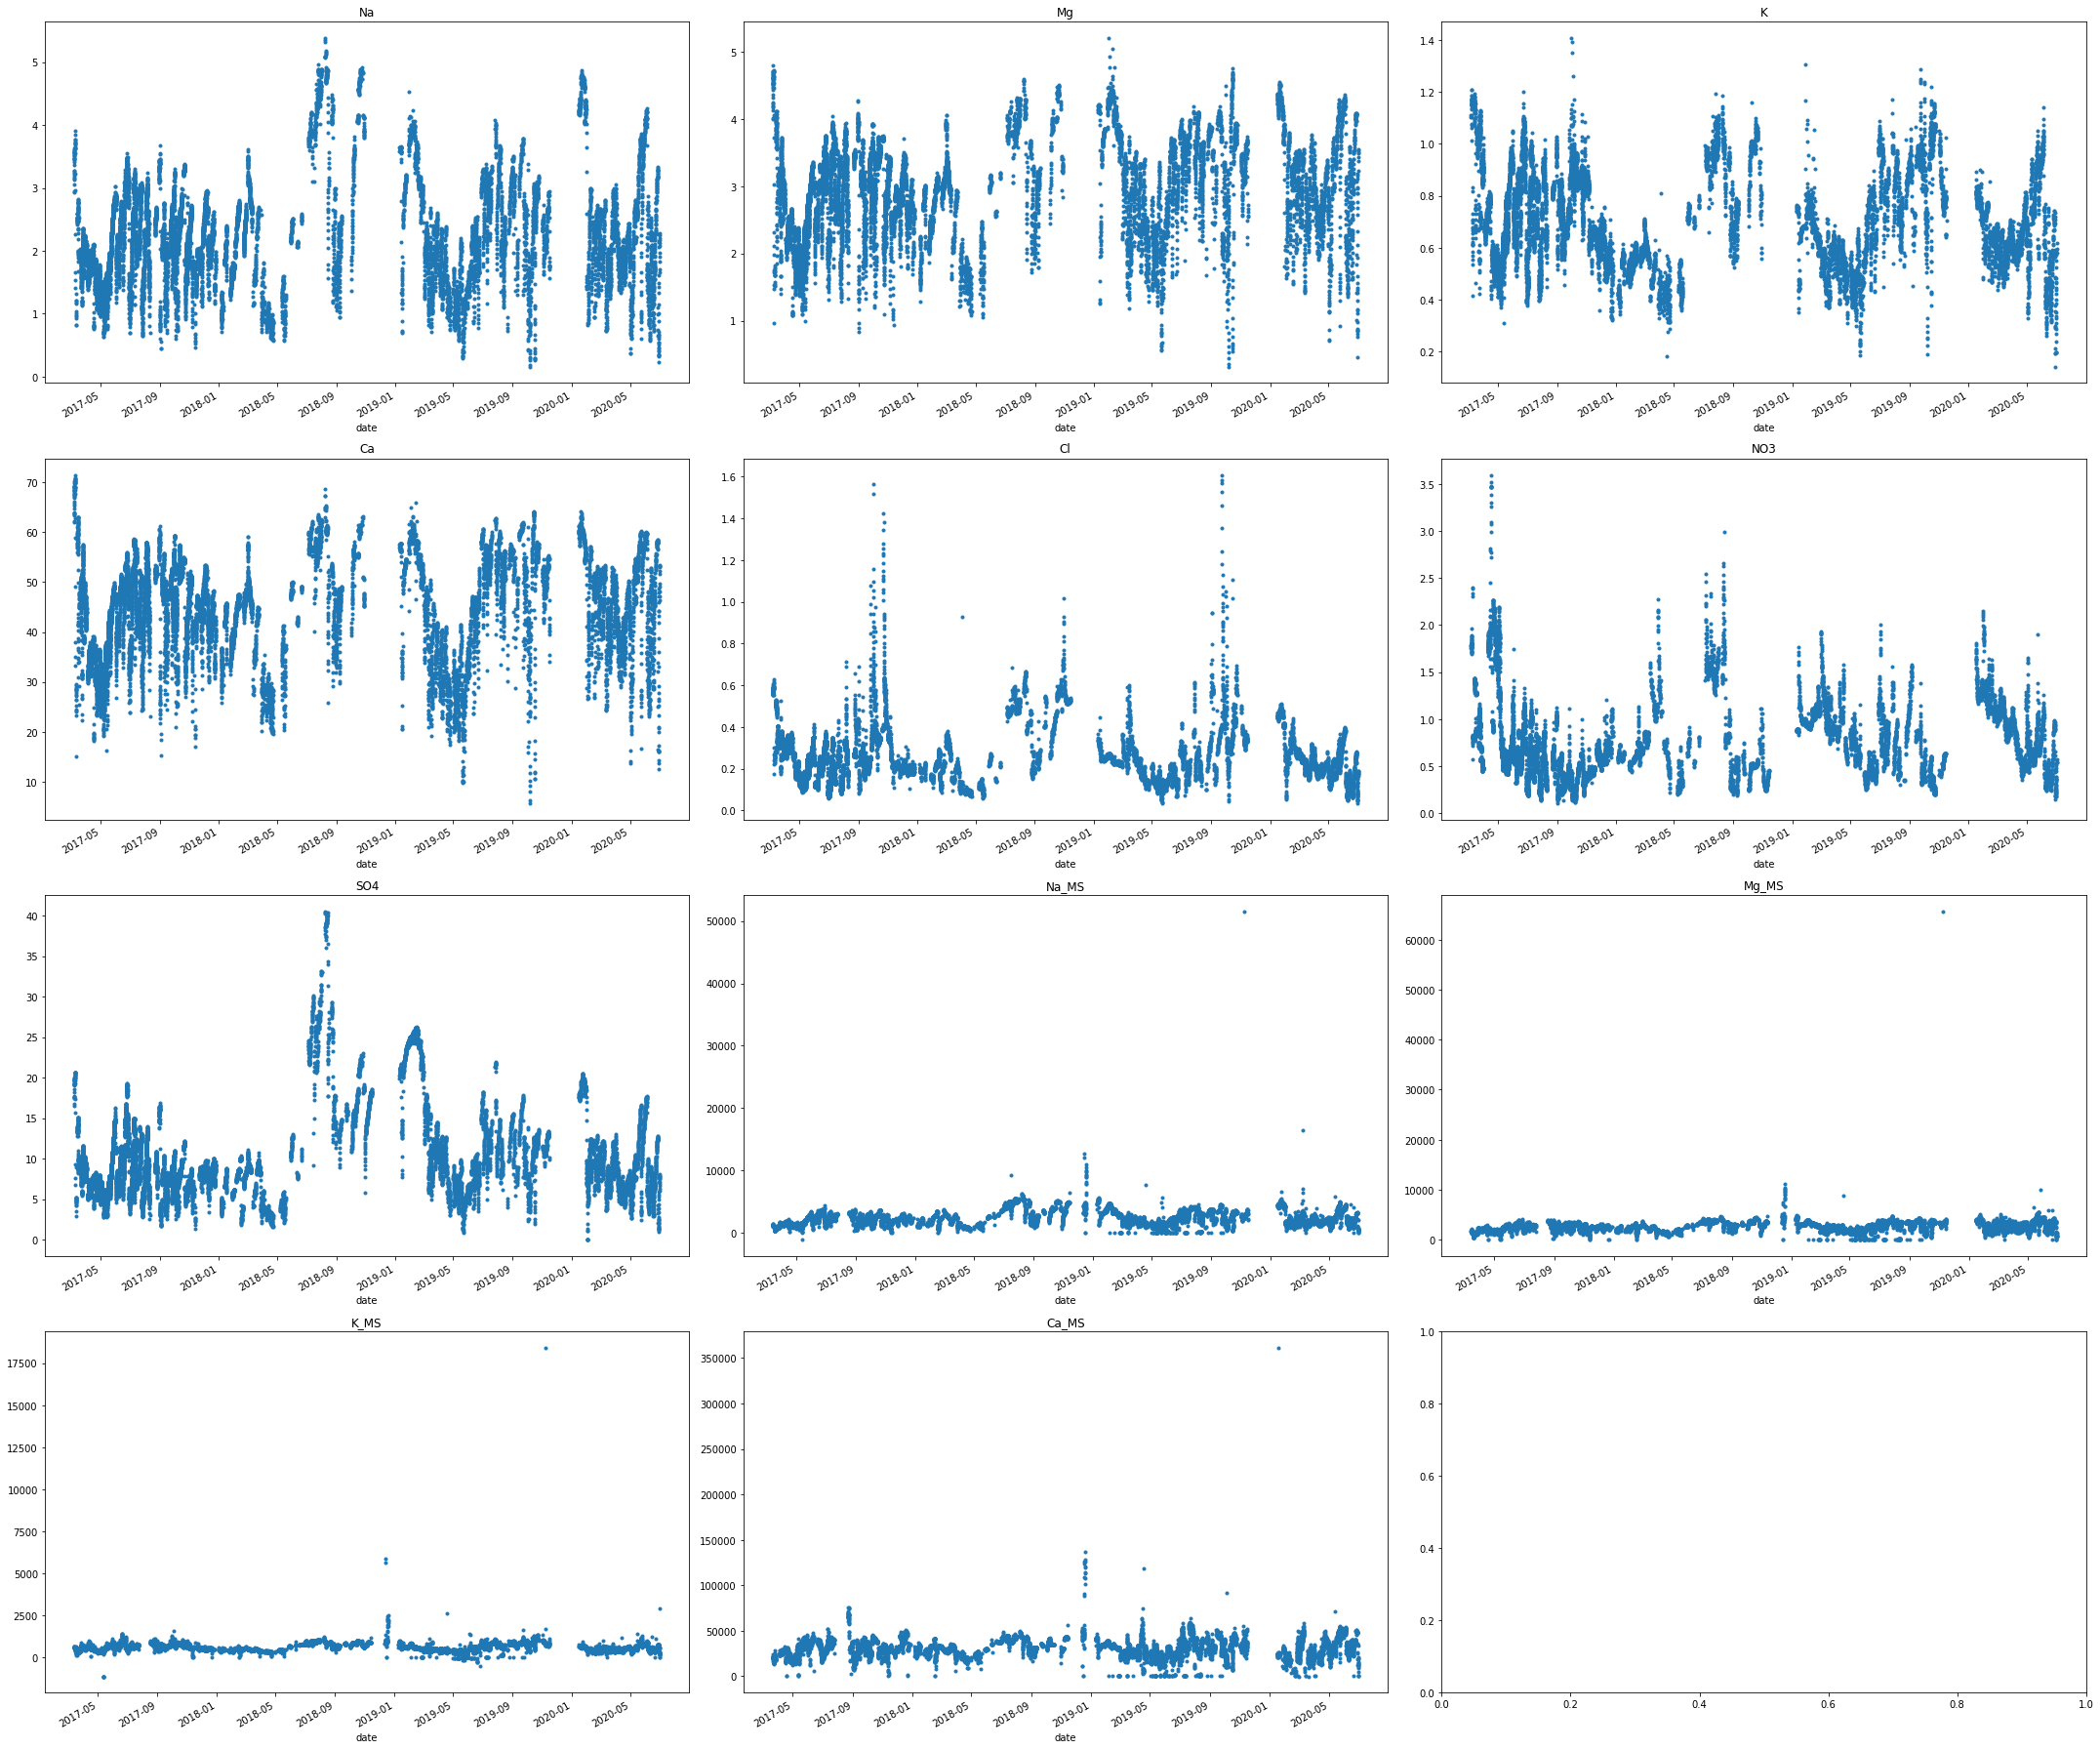

In [ ]:
# Ion concentration features evolution
plot_features_evolution(True, ion_concentration.index[0], ion_concentration.index[-1])

**10 min samples dataset:**

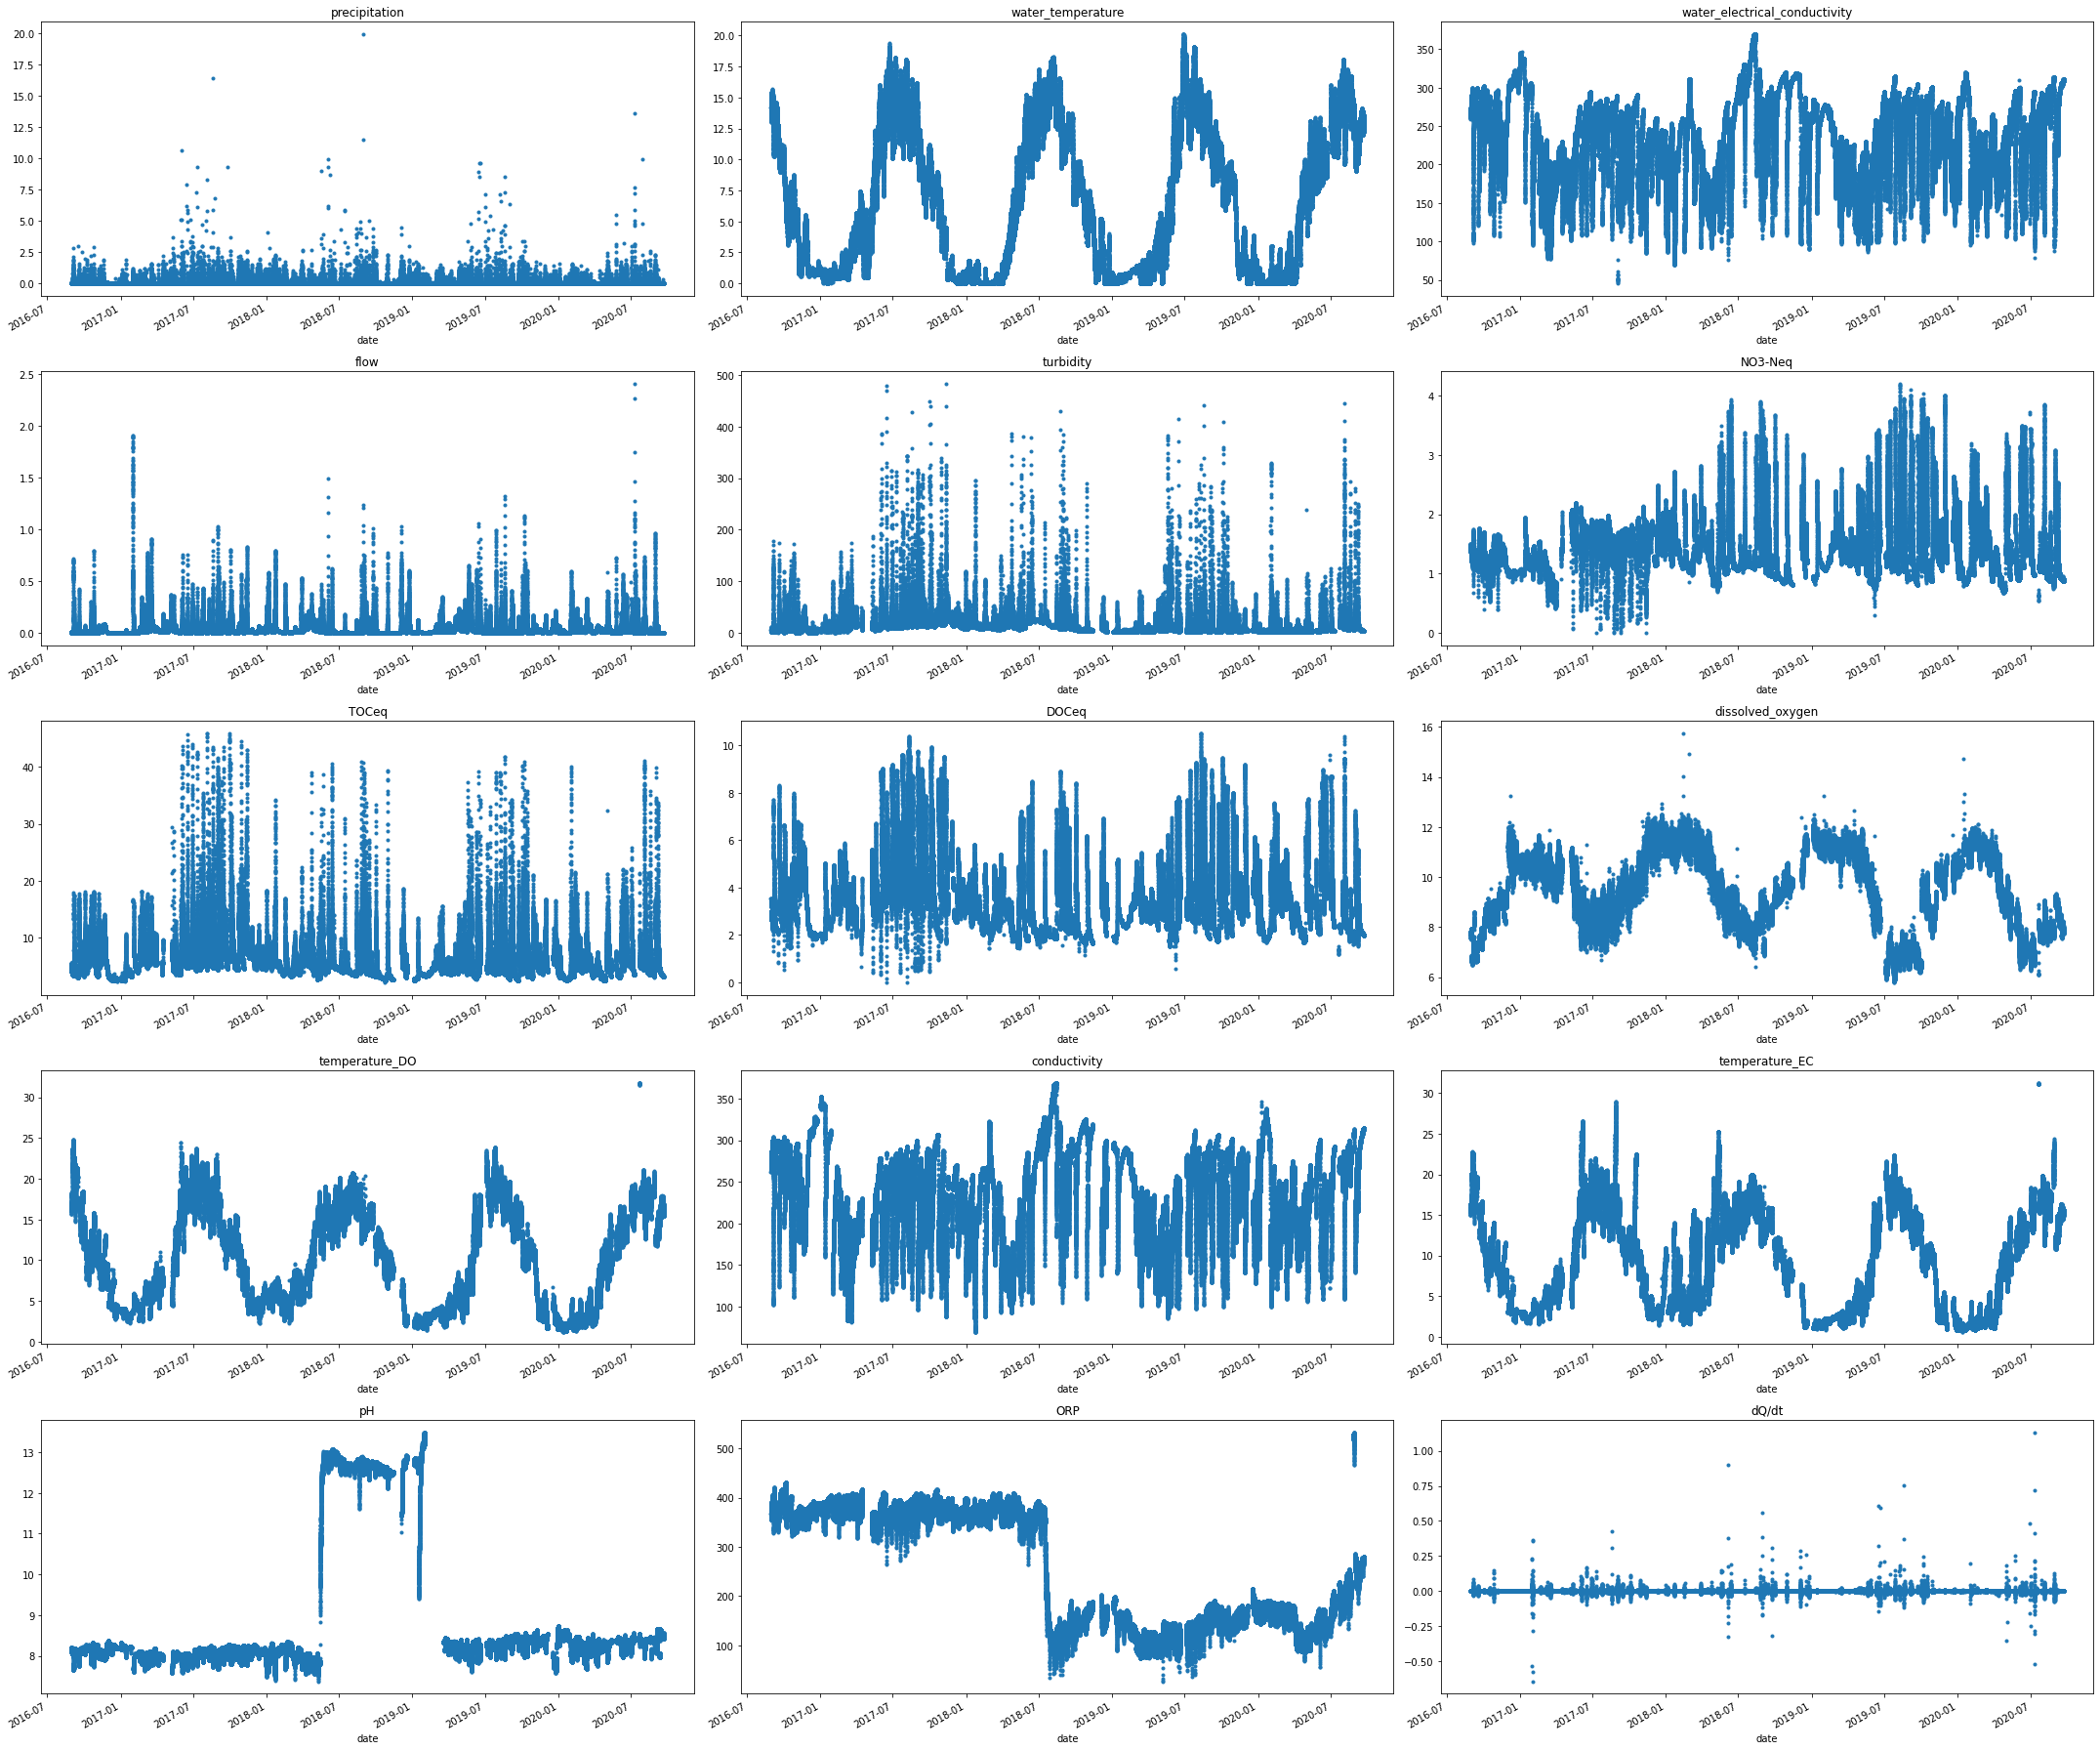

In [ ]:
# 10 min samples : features evolution
plot_features_evolution(False, probe_data10min.index[0], probe_data10min.index[-1])

<a name="outliers-def"></a>
Two observation can be made for the above visualizations:
1. For the ions concentration dataset, columns `Na_MS`, `Mg_MS`, `K_MS` and `Ca_MS` contain an outlier around january 2020 that may need to be removed. 
2. The features (some of them at least) seem to follow a periodic pattern over the years. 


We explore the second point first then see if we can remove the outliers in the second point.

<a name="periodicity"></a>
### Periodicity exploration

We have seen that the features seem to follow a periodic pattern where the period is one year. This is not a surprise given the nature of our data.

We now see if we can find some periodicity on a finer grained level and display the evolution of the features during two months, let's say may and june 2019.

In [ ]:
# compute start and end date for the display
start_date = pd.Timestamp('2019-05-01')
end_date = pd.Timestamp('2019-07-01')

**Ion concentration dataset:**

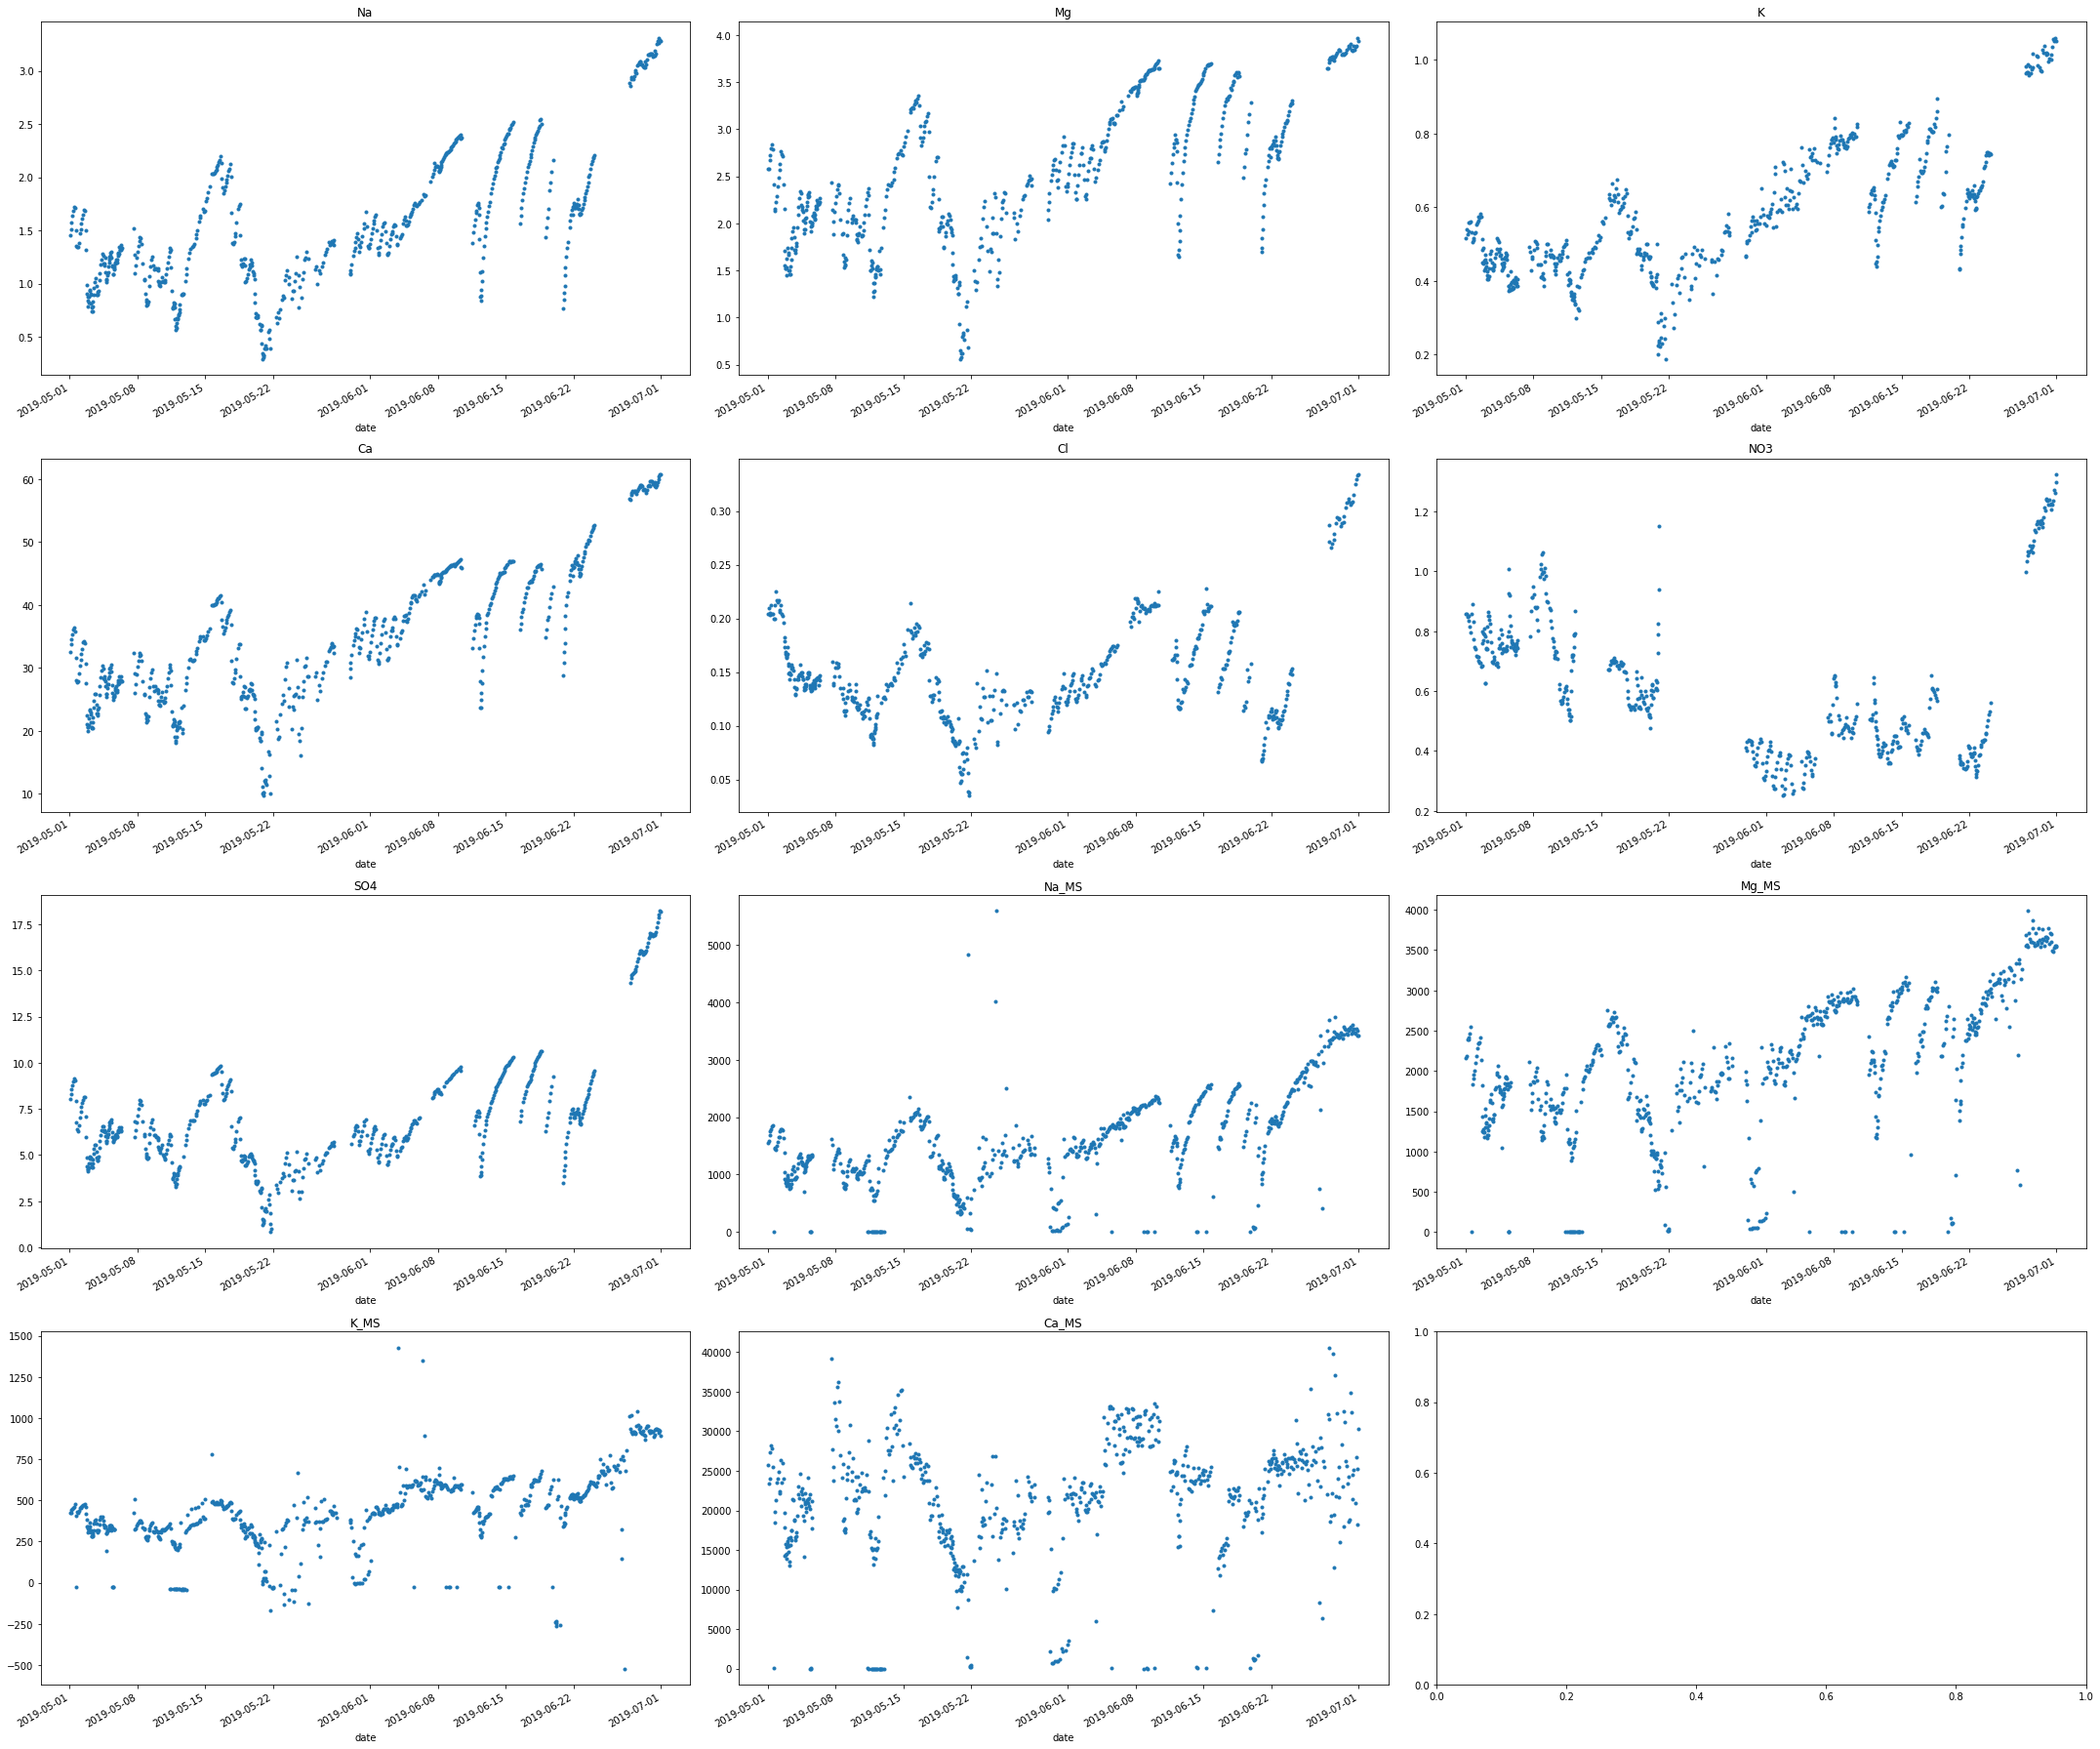

In [ ]:
# Ion concentration features evolution : may, june 2019
plot_features_evolution(True, start_date, end_date)

**10 min samples dataset:**

In [ ]:
# 10 min samples features evolution : may, june 2019
plot_features_evolution(False, start_date, end_date)

We can clearly observe that some of the features also have a daily periodicity. Before processing further with this information, we can verify further this claim in a more formal way using [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform).

<a name="fft"></a>
### Fast Fourier Transform

For simplicity, and because the 10 minutes sampled dataset contains less missing values, we check the periodicity using only the second dataset.

The fourier transform requires us to have the date index "continuous" (ie. one row every 10 minutes, without gap, even if the values are missing). We thus first need to add rows for the missing dates.

In [ ]:
# dates in the dataset
dates = probe_data10min.index

# compute the continuous dates
min_date = dates.min()
max_date = dates.max()
dates_continuous = pd.date_range(min_date, max_date, freq='10T')

# Ensure that our continuous date array contains all the date indexes
dates.intersection(dates_continuous).equals(dates)

In [ ]:
# count number of missing dates
print("Adding ", len(dates_continuous) - len(dates), " missing dates to a new dataframe...")

# Add those missing dates in a new dataframe
probe_data10min_cont = probe_data10min.reindex(dates_continuous, fill_value=0)

# Setting all the NaN values to zero
probe_data10min_cont.fillna(value=0, inplace=True)

Now we can perform Fourier Transform to detect the frequencies present in the dataset

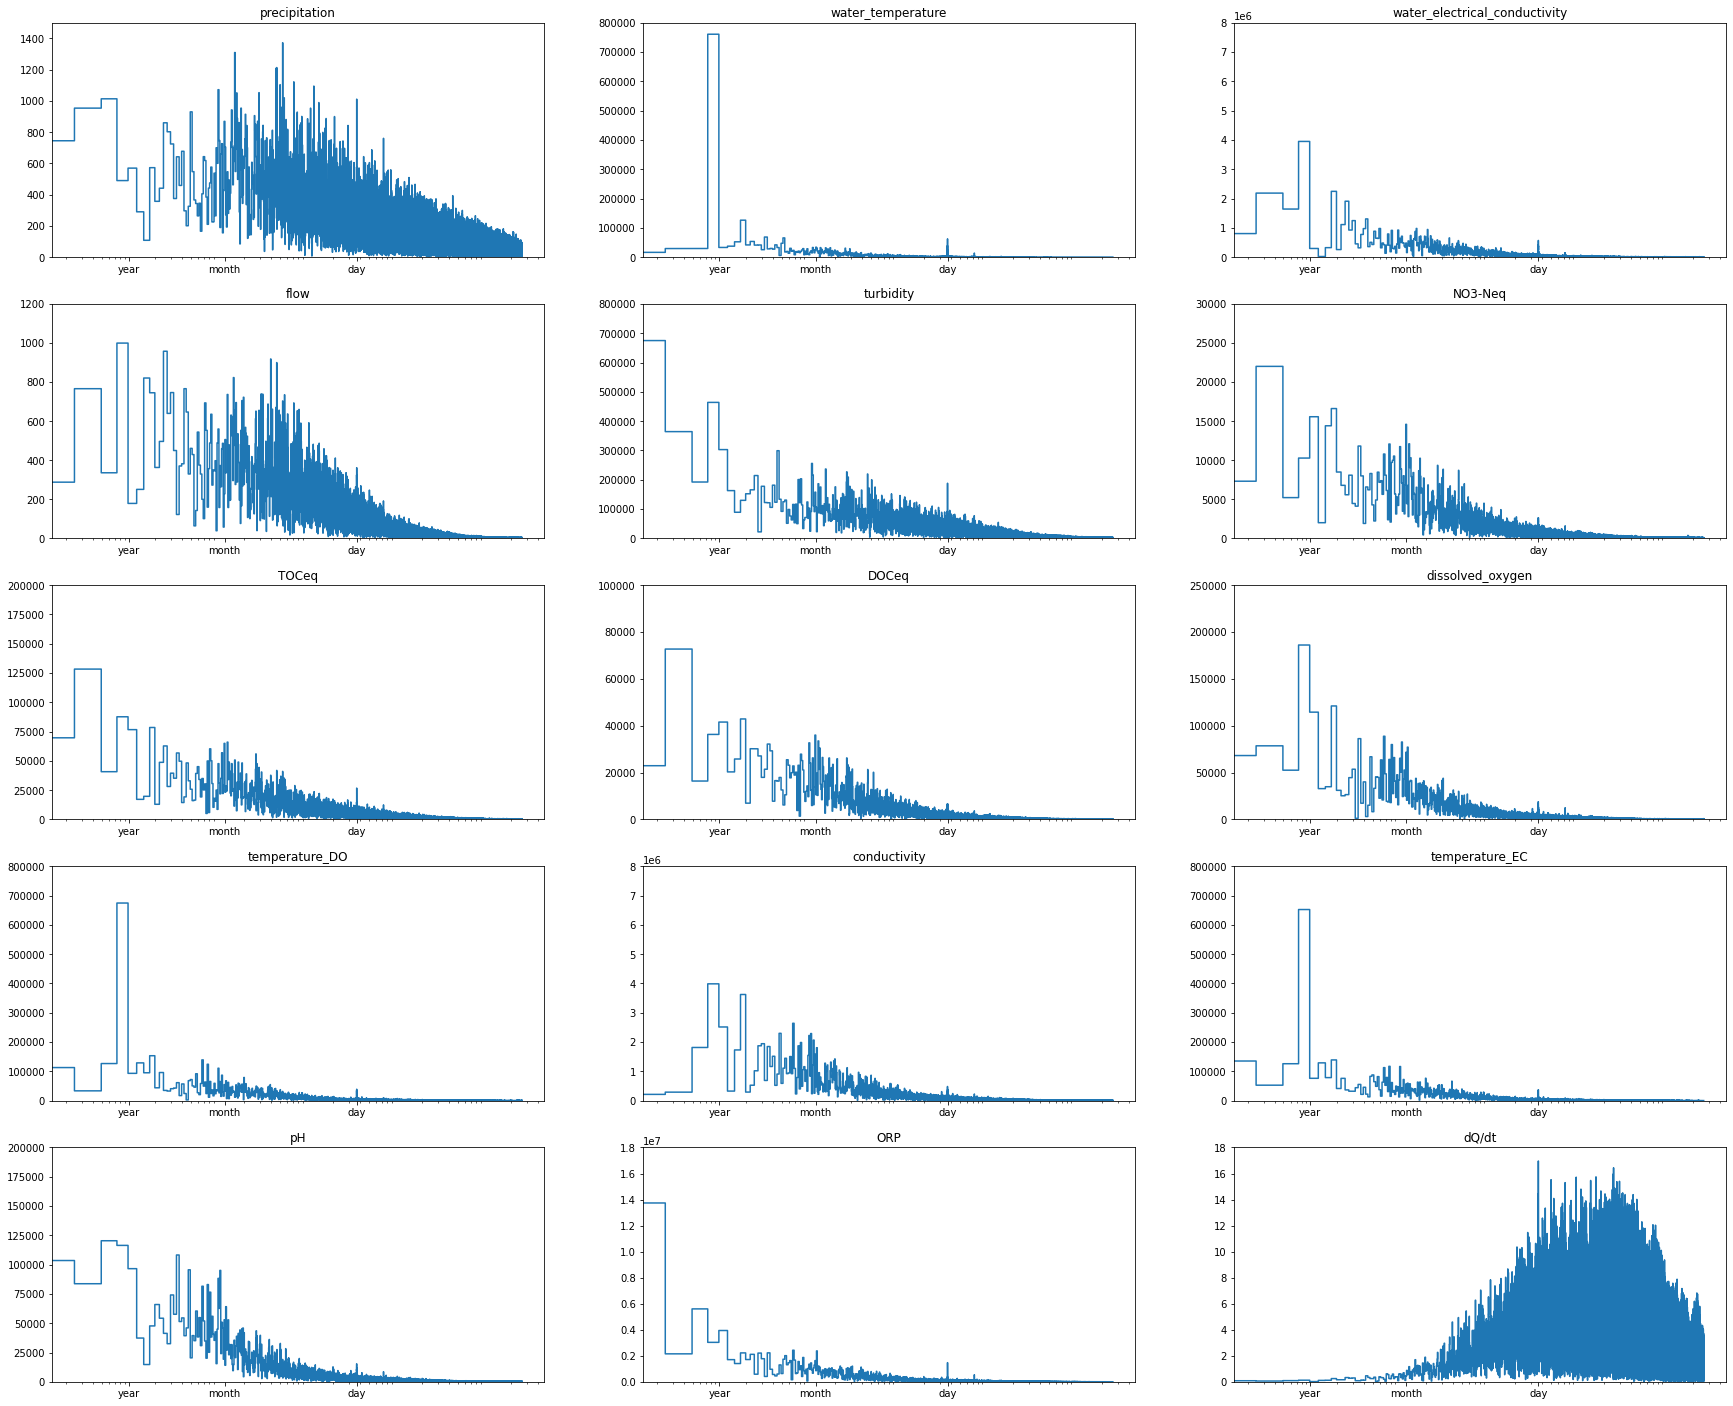

In [ ]:
y_maxes = [1500, 8e5, 8e6, 1200, 8e5, 3e4, 2e5, 1e5, 2.5e5, 8e5, 8e6, 8e5, 2e5, 1.8e7, 18]

rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(30,25))
for i in range(rows):
  for j in range(cols):
    # column to plot
    column_name = probe_10min_cols[i*cols + j]
    column = probe_data10min_cont[column_name]
    # compute rfft
    rfft = torch.fft.rfft(torch.tensor(column))

    # x range
    x = np.arange(0, len(rfft))
    nb_10_min = len(column)
    nb_10_min_per_year = 365.2524 * 24 * 6
    nb_year = nb_10_min/nb_10_min_per_year
    x = x/nb_year

    # plot
    axes[i,j].step(x, np.abs(rfft))
    axes[i,j].set_xscale('log')
    axes[i,j].set_ylim(0, y_maxes[i*cols + j])
    axes[i,j].set_xticks([1, 12, 365.2524])
    axes[i,j].set_xticklabels(['year','month','day'])
    axes[i,j].set_title(column_name)


In the above plots we see that a lot of features have distinguishable peaks at `year` and `day`. This means that the `1/year` and `1/day` are frequencies important to our dataset and it will make sense to create two additional features to represent "time of the day" and "time of the year" of a given sampling. 

We will create those two features later on. For now we go back to the second point described [before](#outliers-def), concerning the outliers.

## Handling Outliers

The ion concentration dataset have some surprinsingly high values for its features `Na_MS`, `Mg_MS`, `K_MS` and `Ca_MS`. Moreover, it seems that the data is completely missing between november 2019 and january 2020.

We plot the features for those two months.

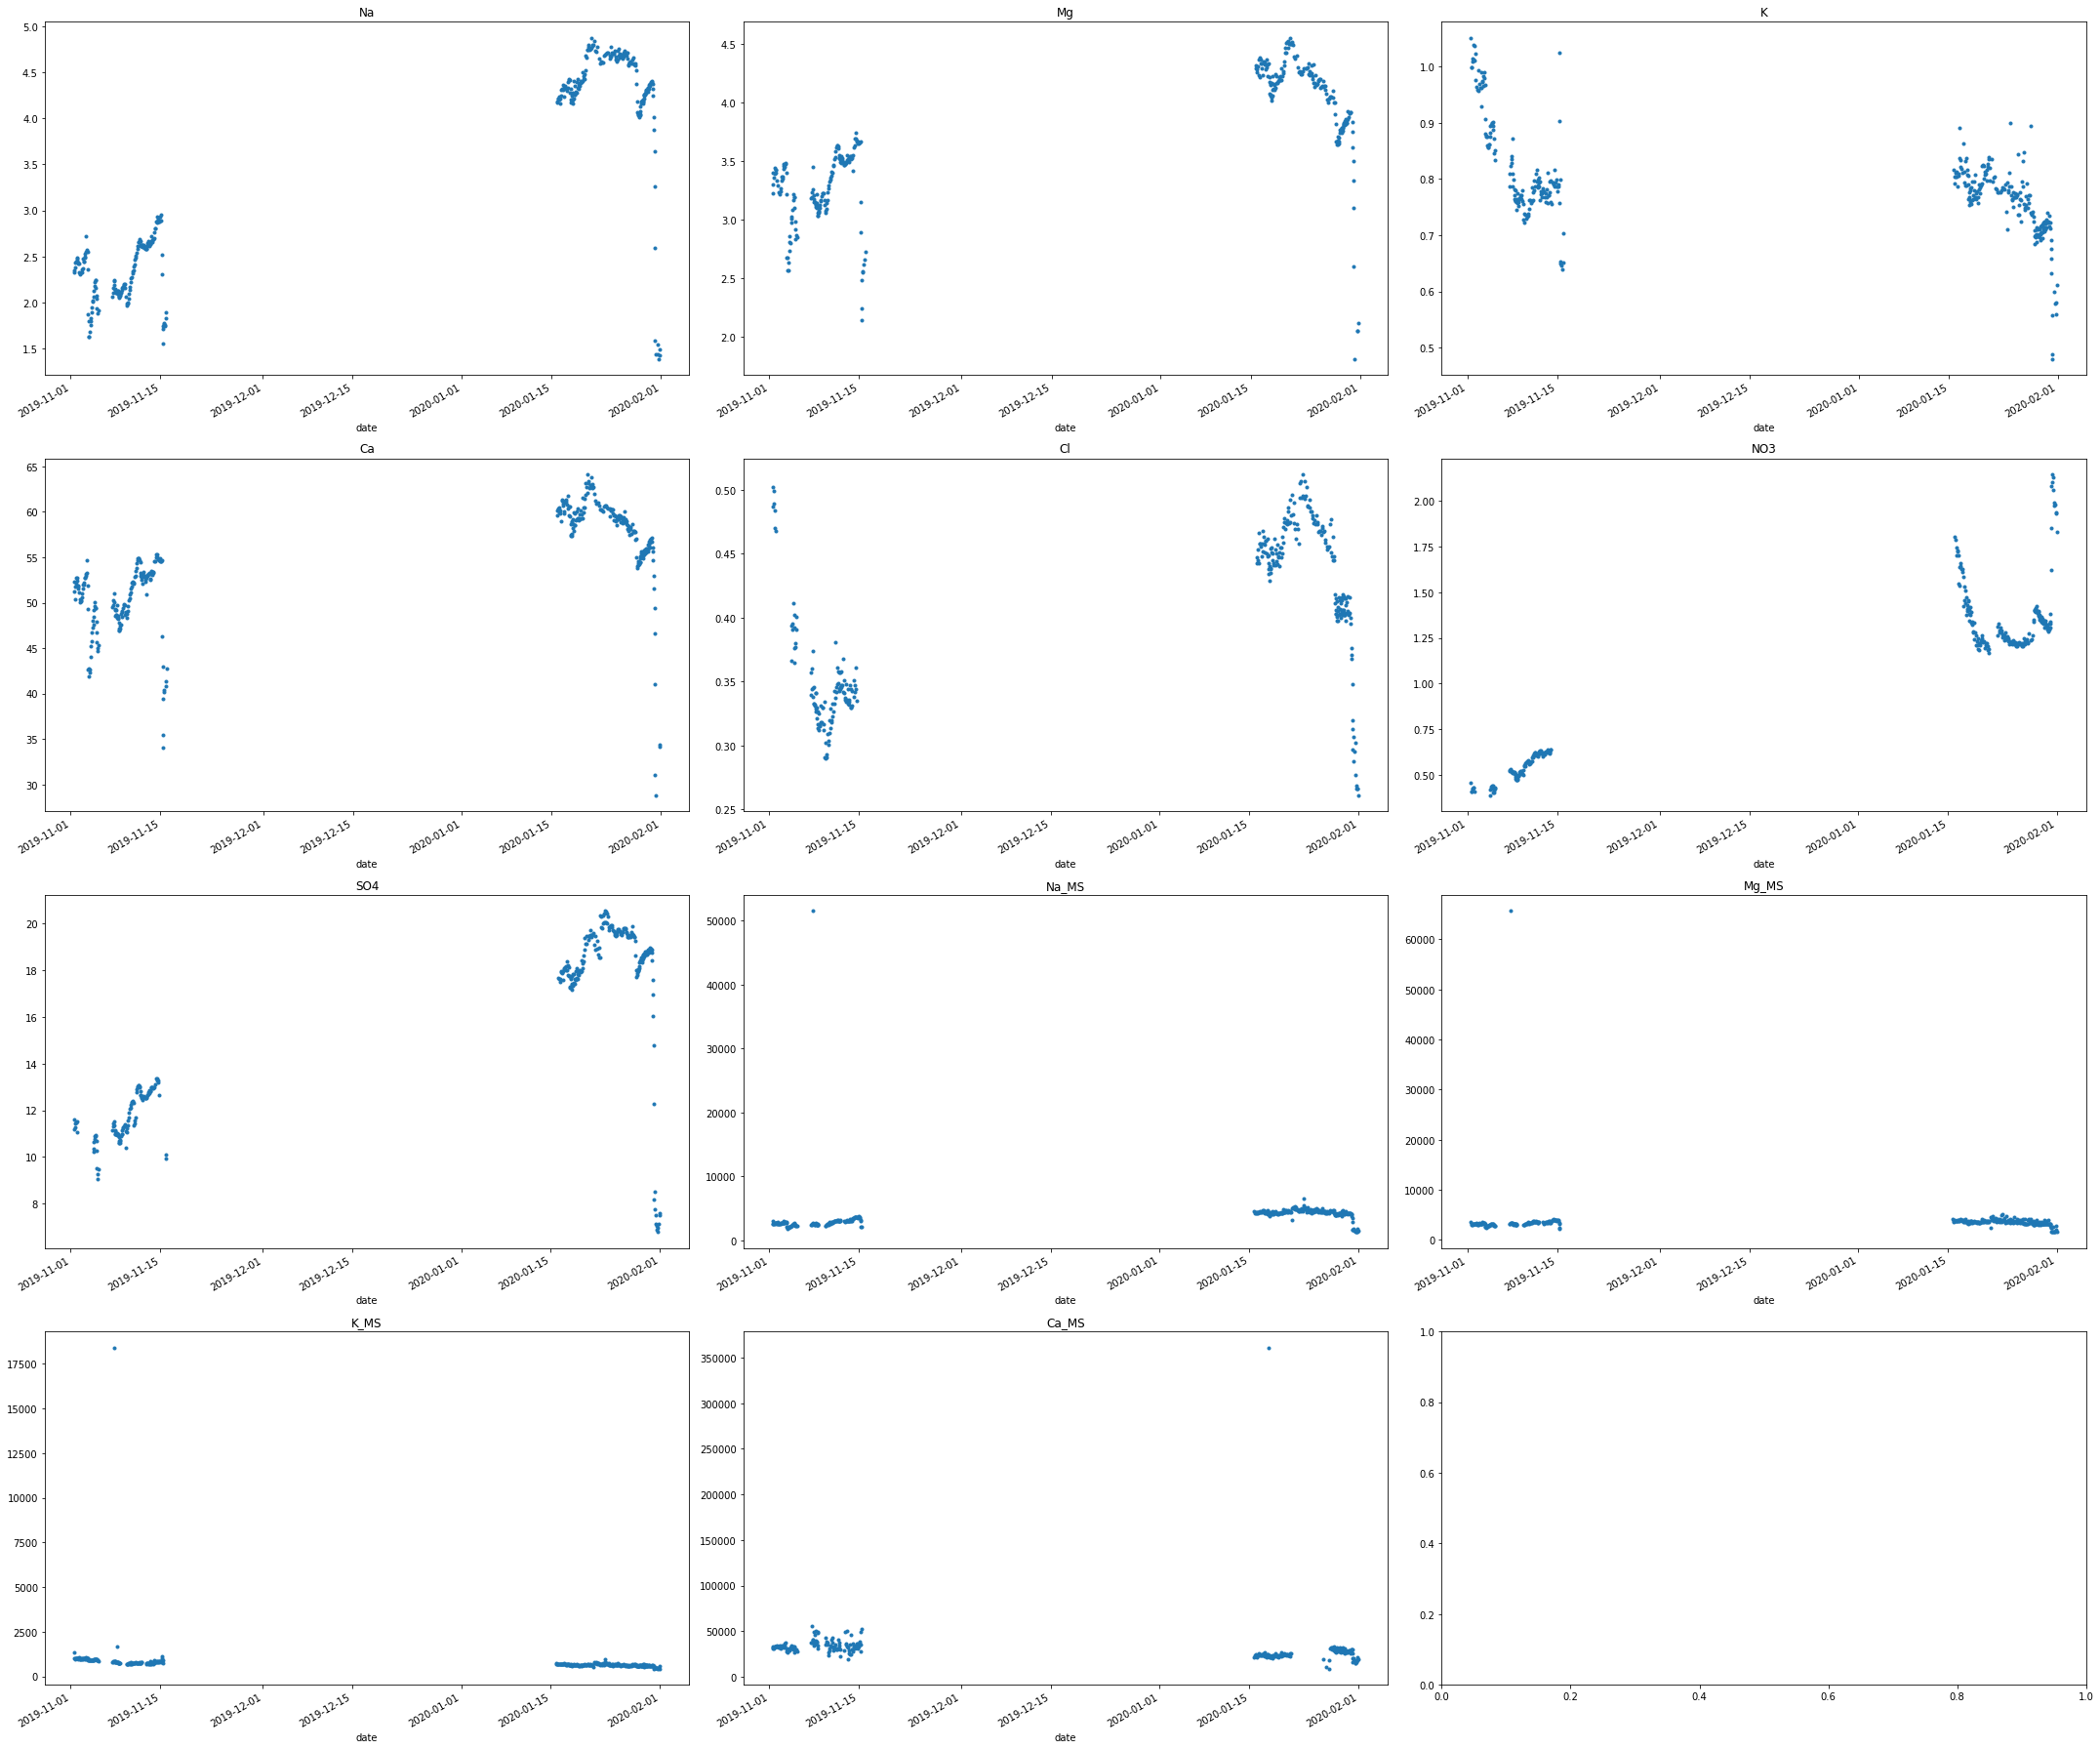

In [ ]:
# compute start and end date for the display
start_date = pd.Timestamp('2019-11-01')
end_date = pd.Timestamp('2020-02-01')

# Ion concentration features evolution : may, june 2019
plot_features_evolution(True, start_date, end_date)

In [ ]:
Na_MS_max = 2e4
Mg_MS_max = 2e4
K_MS_max =  1e4
Ca_MS_max = 2e5

# compute rows corresponding to those high values
outliers = ion_concentration[(ion_concentration['Na_MS'] >= Na_MS_max) | 
                             (ion_concentration['Mg_MS'] >= Mg_MS_max) | 
                             (ion_concentration['K_MS'] >= K_MS_max) | 
                             (ion_concentration['Ca_MS'] >= Ca_MS_max)]

outliers

,Na,Mg,K,Ca,Cl,NO3,SO4,Na_MS,Mg_MS,K_MS,Ca_MS,comments_IC,comments_MS
date,,,,,,,,,,,,,
2019-11-07 19:00:00,2.248,3.449,0.836,51.034,0.360,0.53,11.532,51530.5060,65637.7670,18403.0450,40722.1930,NaN,NaN
2020-01-18 00:00:00,4.201,4.081,0.790,57.423,0.434,1.41,17.289,4092.4547,3430.3769,614.2798,361029.2482,NaN,NaN


Observe that the "gap" starts from `2019-11-15` to `2020-01-15`, and that there is two samples presenting those improbable values. The first one happens right before the "gap", the second one right after. We assume that something happened with the sampling tools around this period and that those values are therefore invalid. We discard them. 

In [ ]:
print(len(ion_concentration))

# drop the rows
ion_concentration.drop(index=outliers.index, inplace=True)

print(len(ion_concentration))

19003
19001


Now the values of features `Na_MS`, `Mg_MS`, `K_MS` and `Ca_MS` span the entire y axis.

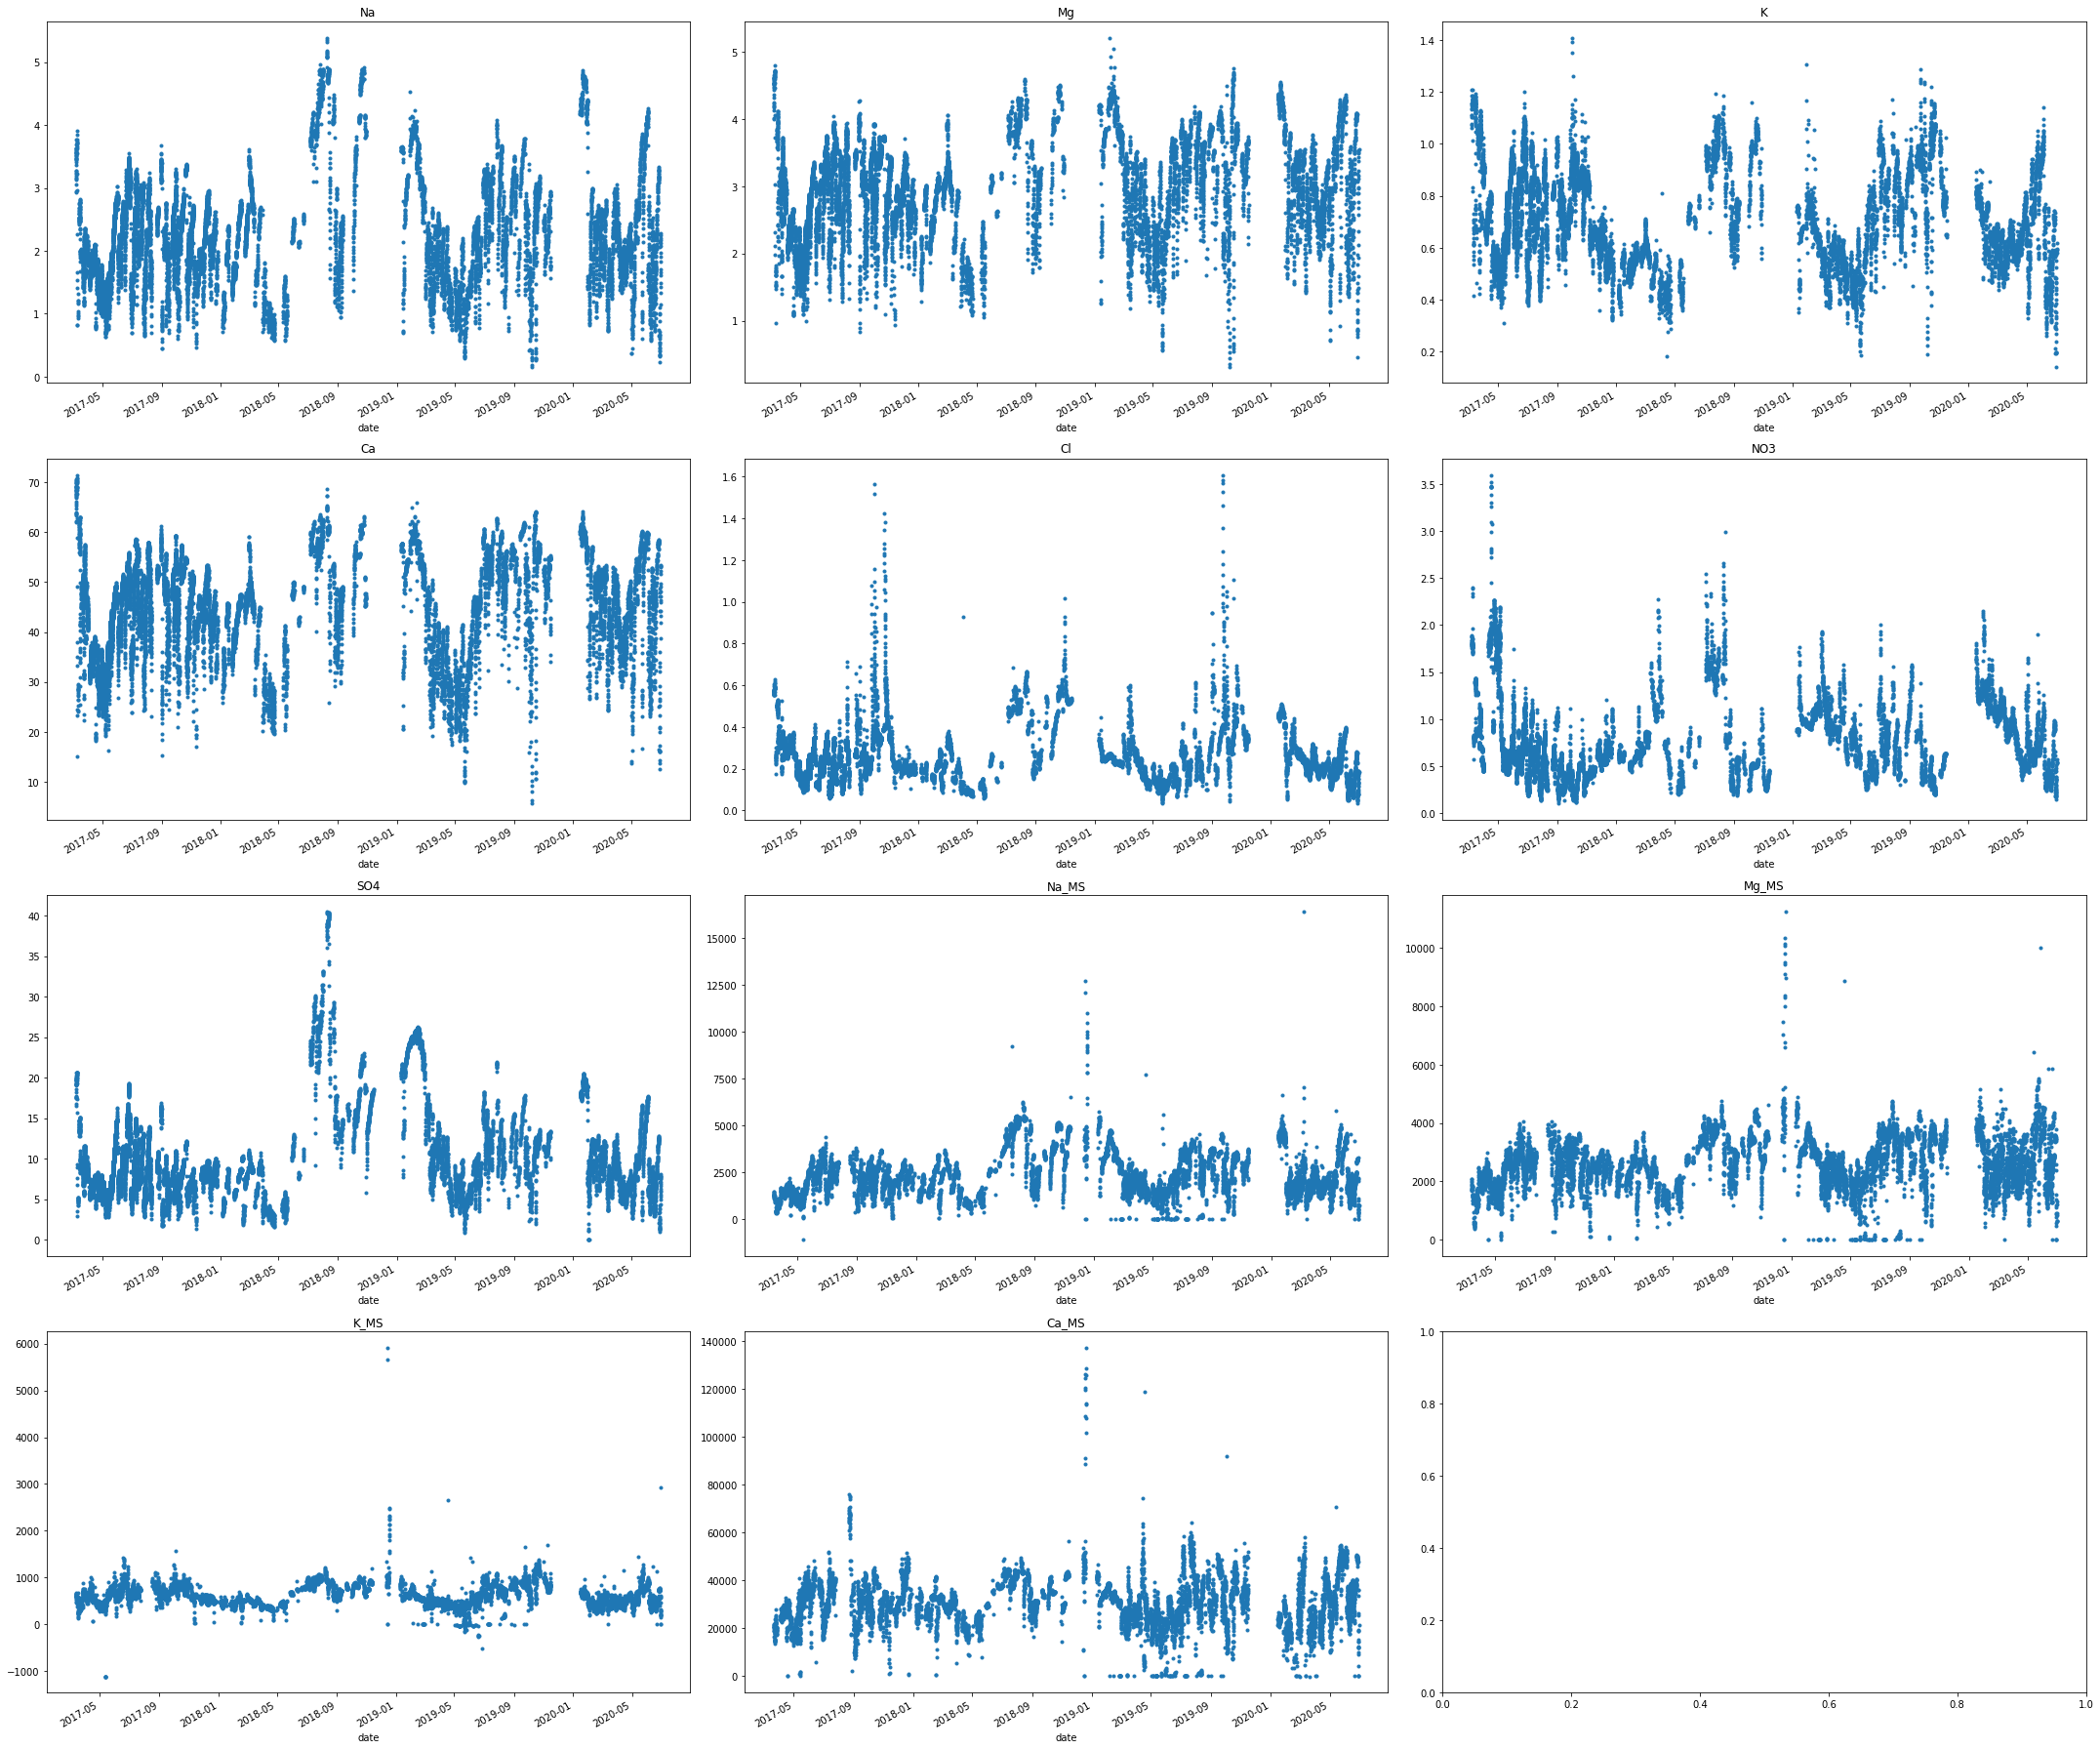

In [ ]:
# Ion concentration features evolution
plot_features_evolution(True, ion_concentration.index[0], ion_concentration.index[-1])

## Features Distributions

The visualization of the feature's distributions is important to  identify skewed data and apply log transform.

We define the following helping functions:
* `plot_distribution`: plot the distributions of the different features
* `log_transform` : apply a log transformation on the given features

In [ ]:
def plot_distributions(ion_conc, columns=False):
  """ plot the distribution of the feature for either ion_concentration or probe_data10min dataset"""

  # df and columns to plot depends on ion_conc parameter
  df_to_plot = ion_concentration if ion_conc else probe_data10min
  columns_to_plot = ion_cols if ion_conc else probe_10min_cols
  
  if columns != False:
    columns_to_plot = columns

  rows = int(np.ceil(len(columns_to_plot)/3))
  cols = 3
  fig, axes = plt.subplots(rows, cols, figsize=(30,25))

  for i in range(rows):
    for j in range(cols):
      # plot nothing if out of range
      if (i*cols + j) >= len(columns_to_plot):
        break
      # column to plot
      column = columns_to_plot[(i*cols + j)]
      # plot respective column from start_date to end_date
      df_to_plot[column].hist(ax=axes[i,j], bins=100)
      #title
      axes[i,j].set_title(column)

  plt.tight_layout()
  plt.show()

In [ ]:
def log_transform(df, columns):
  """ apply log transformation on the features of either ion_concentration or probe_data10min dataset"""

  for col in columns:
    df[col] = np.log10(1+df[col])

### Ion concentration dataset

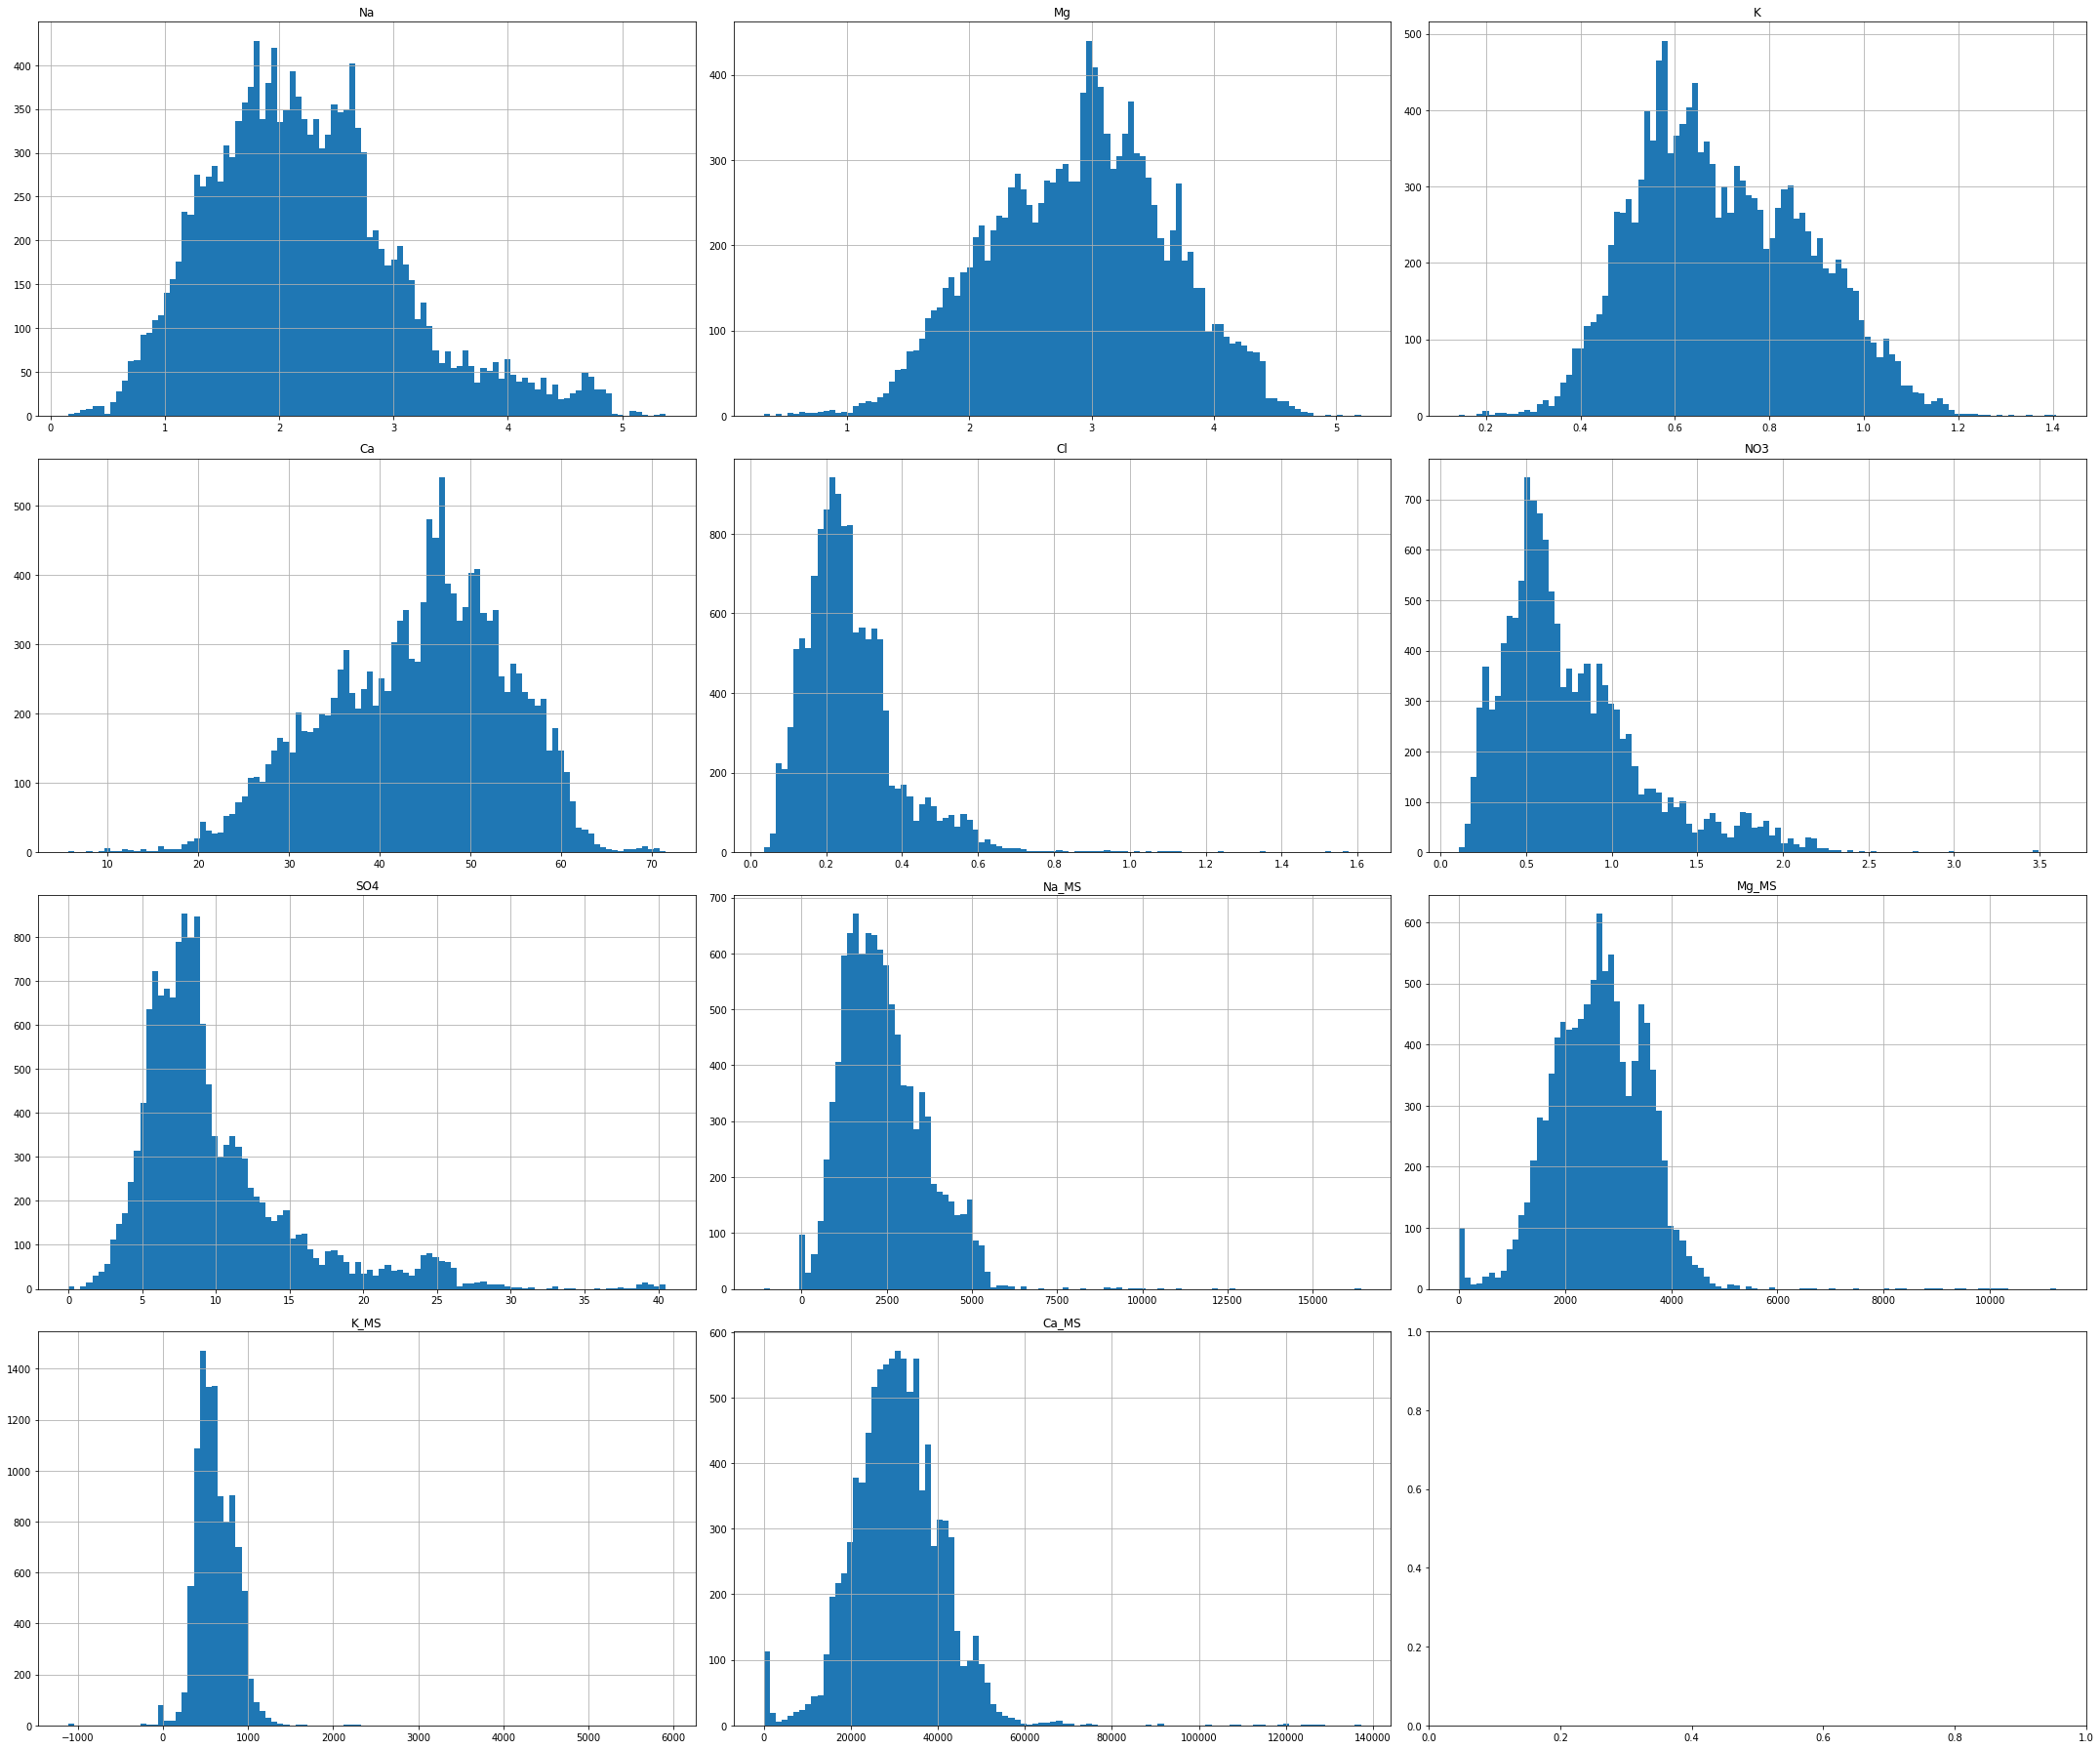

In [ ]:
# plot the distributions for ion_concentration
plot_distributions(True)

There is no highly skewed features in this dataset. We will just need to standardize it later.

### 10 min samples dataset

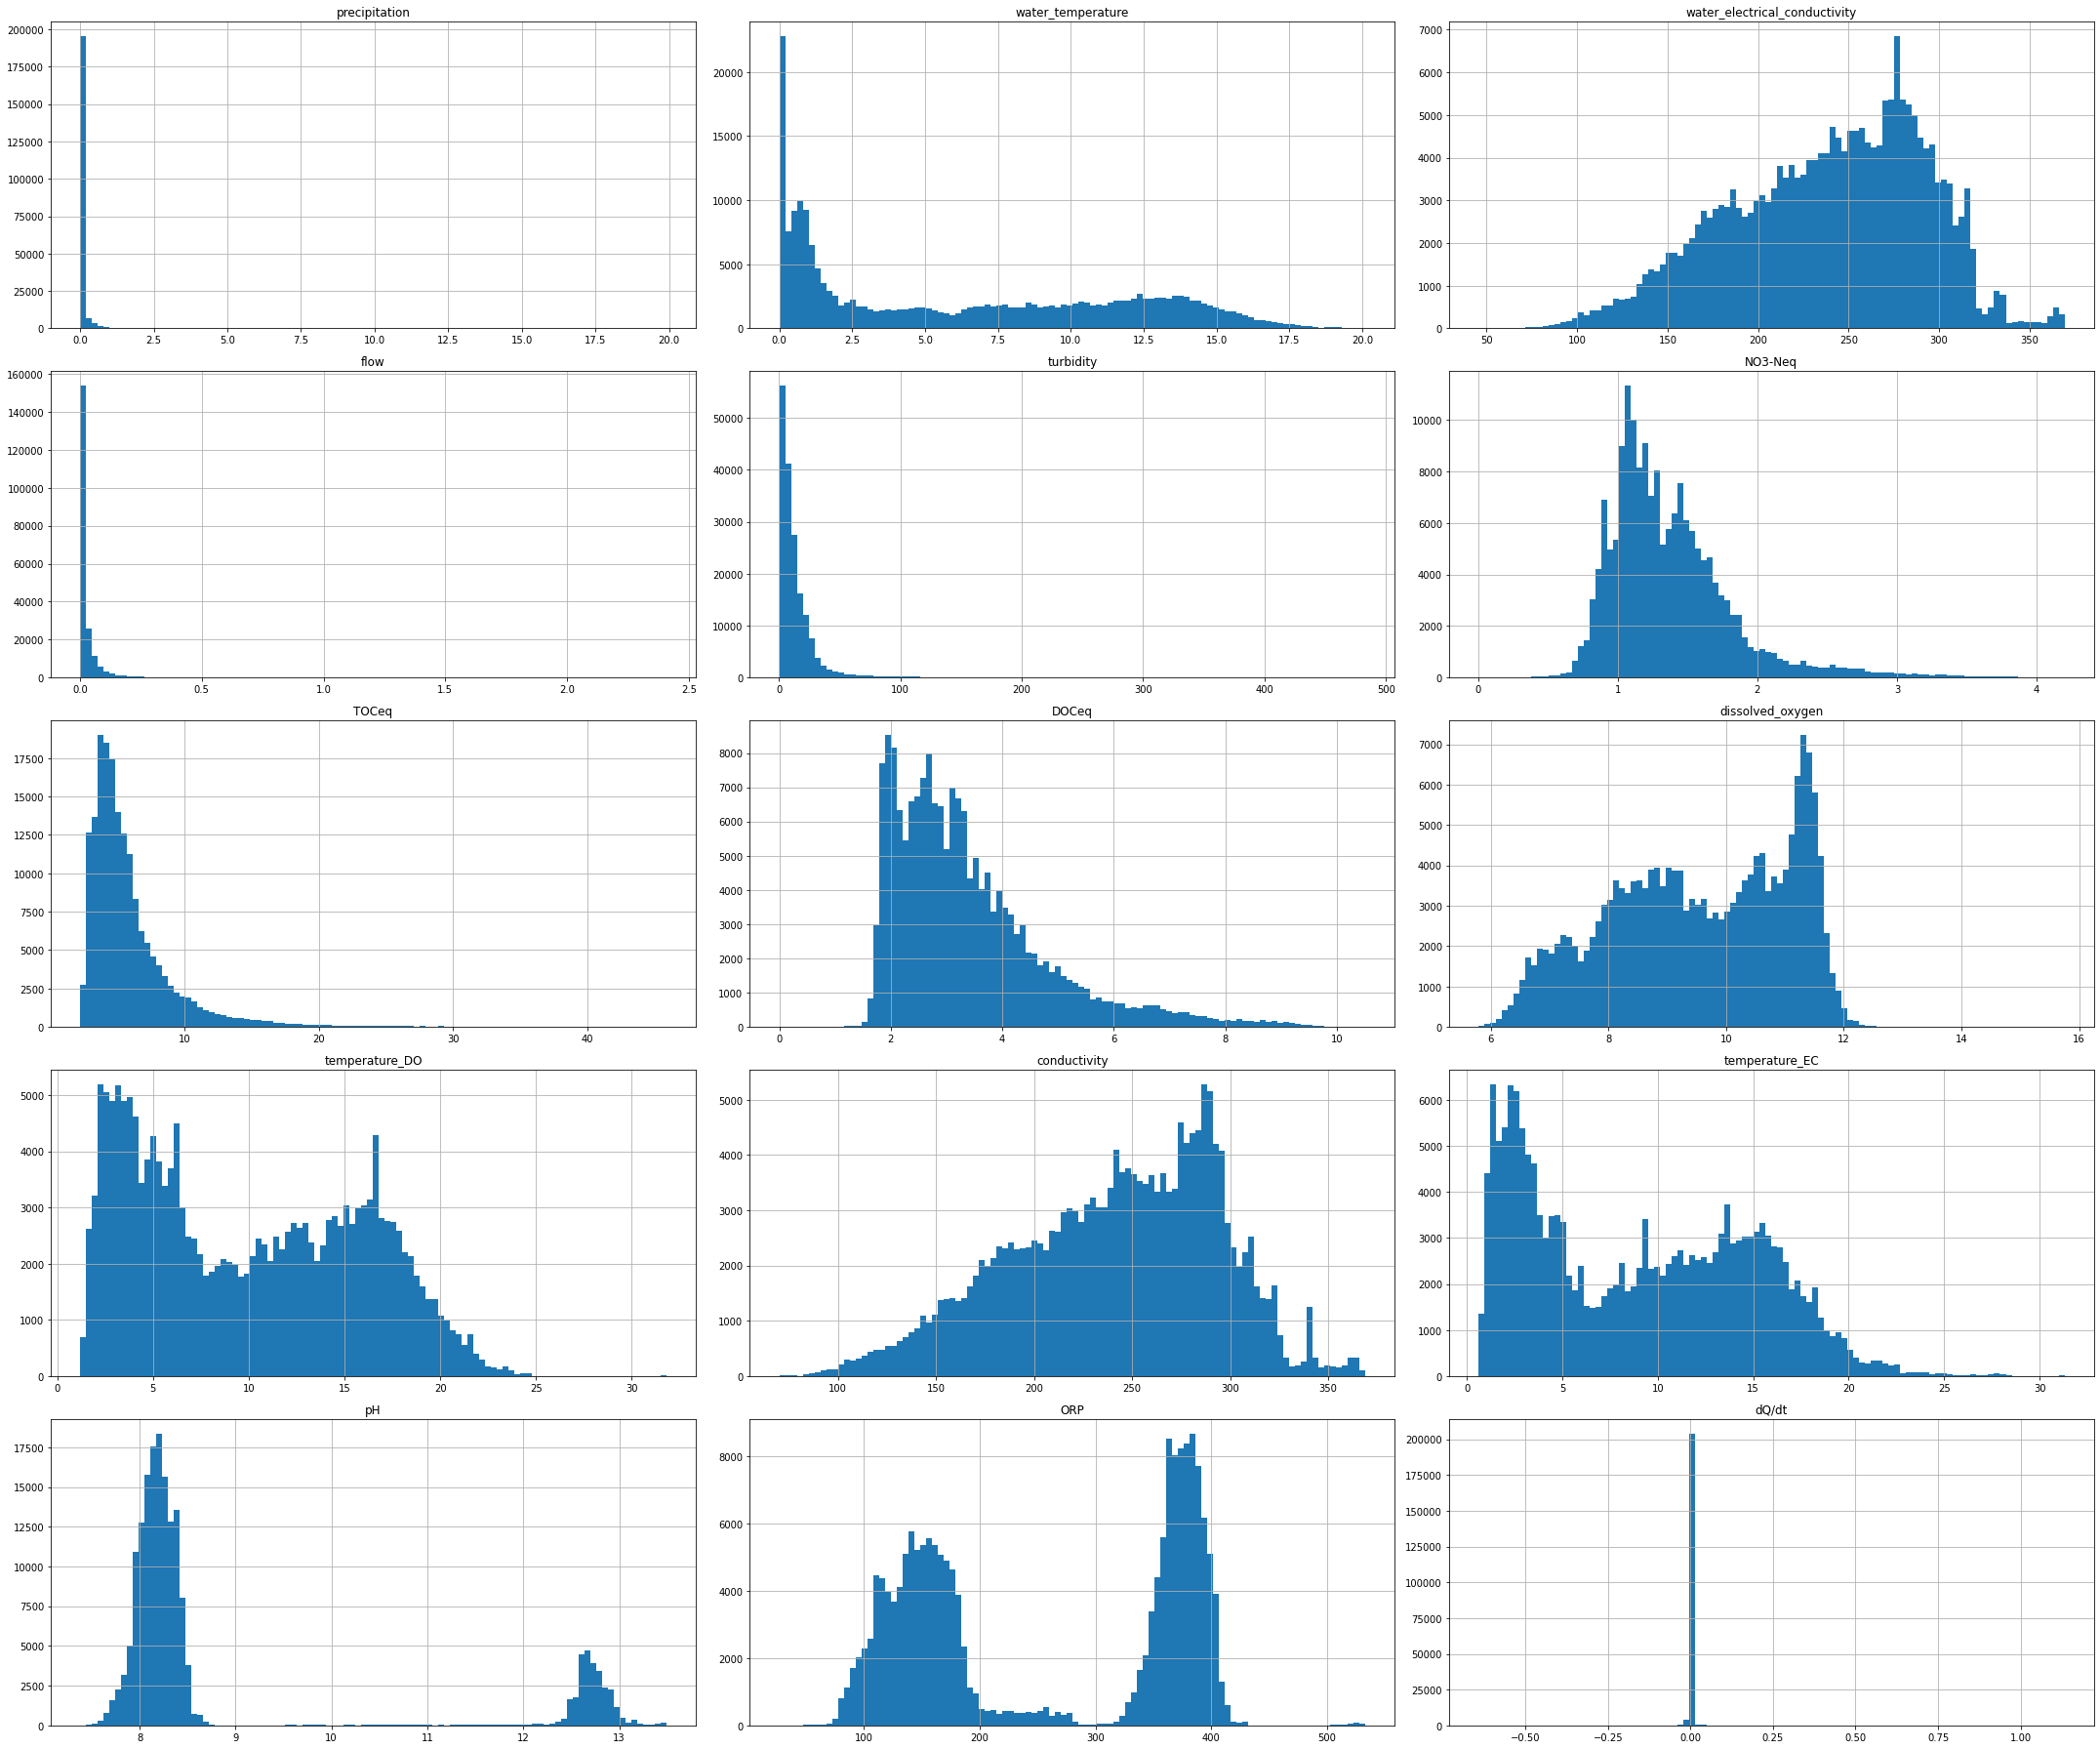

In [ ]:
# plot the distributions for probe_data10min
plot_distributions(False)

In [ ]:
# log transform
columns = ['water_temperature','turbidity', 'TOCeq']
log_transform(probe_data10min, columns)

Note: directly applying log transform to `precipitation` and `flow` don't allow to reduce the skewness. Additional transformations need to be applied.

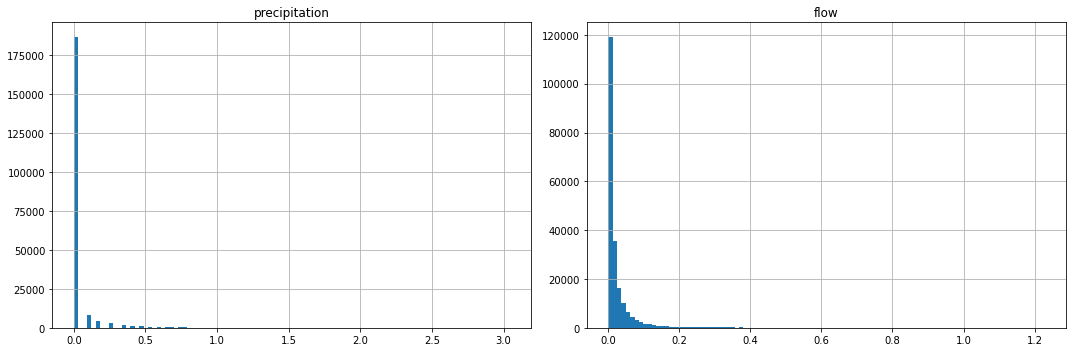

In [ ]:
# log transform of 'precipitation' and 'flow' illustration
tmp = probe_data10min[['precipitation', 'flow']].copy()
tmp['precipitation'] = np.log(1 + tmp['precipitation'])
tmp['flow'] = np.log(1 + tmp['flow'])

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
tmp['precipitation'].hist(ax=ax1, bins=100)
tmp['flow'].hist(ax=ax2, bins=100)
ax1.set_title('precipitation')
ax2.set_title('flow')
plt.tight_layout()
plt.show()

The result is still very skewed. We notice that in the case of `precipitation`, the feature really has a high proportion of zero values. So not much can be done to reduce the skewness of this feature.

In [ ]:
# show the fraction of zero values in 'precipitation'
nb_prec = probe_data10min['precipitation'].notnull().sum()
nb_zeros = len(probe_data10min[probe_data10min['precipitation'] == 0])
print("fraction of zero precipitation: ", nb_zeros/nb_prec)

fraction of zero precipitation:  0.8901433947882426


For the `flow` feature, we can apply $x' = \sqrt{x} \cdot c$ ($c$ is for getting larger values, well-suited for log transform) and then do the log transformation.

In [ ]:
# square root then log transform
c = 100
probe_data10min['flow'] = np.sqrt(probe_data10min['flow'])*c
probe_data10min['flow'] = np.log(1 + probe_data10min['flow'])

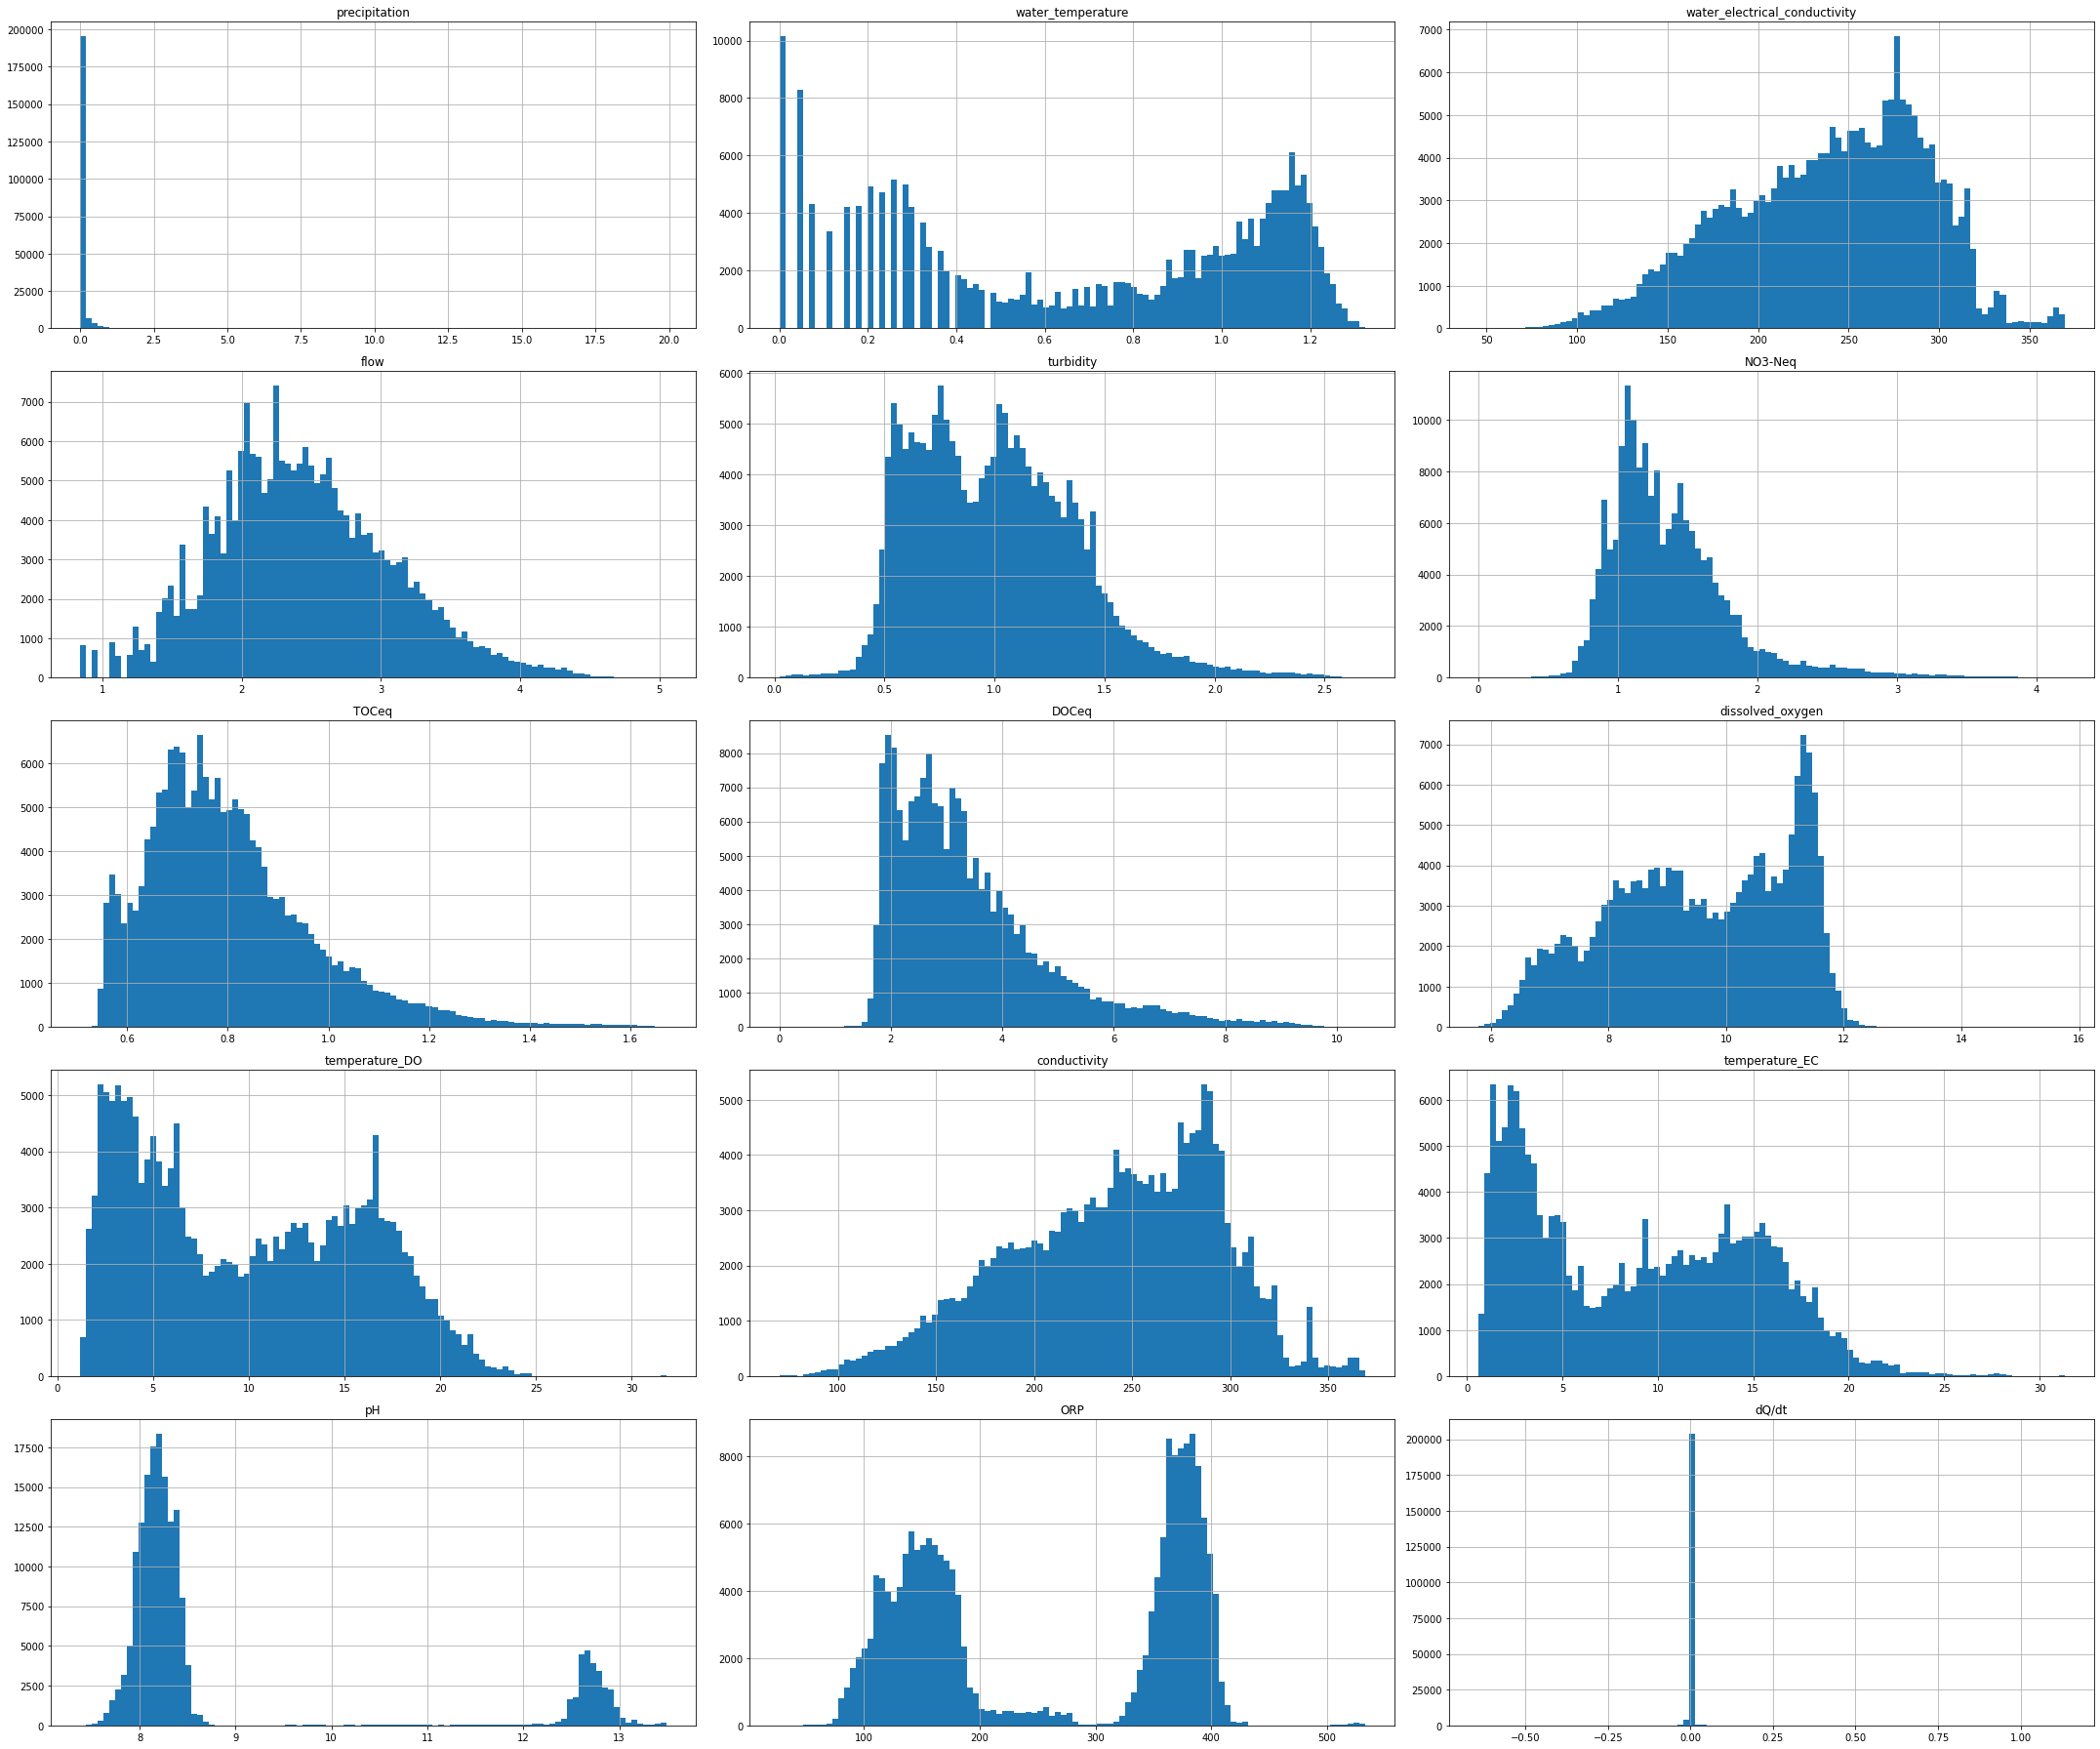

In [ ]:
# plot new distributions
plot_distributions(False)

## Day and Year periodicity features

As observed in the [periodicity exploration](#outliers-def") and [fast fourier transform](#fft) sections, our datasets present a yearly and daily periodicity.

We thus create two additional features for our two datasets: `time_of_year` and `time_of_day`

In [ ]:
# day and year in terms of seconds
day = 24 * 60 * 60
year = day * 365.2425

### Ion concentration dataset



In [ ]:
# dates casted in float
dates_float = ion_concentration.index.map(pd.Timestamp.timestamp)

# set the two features
ion_concentration['time_of_day'] = np.sin(dates_float * 2 * np.pi / day)
ion_concentration['time_of_year'] = np.sin(dates_float * 2 * np.pi / year)

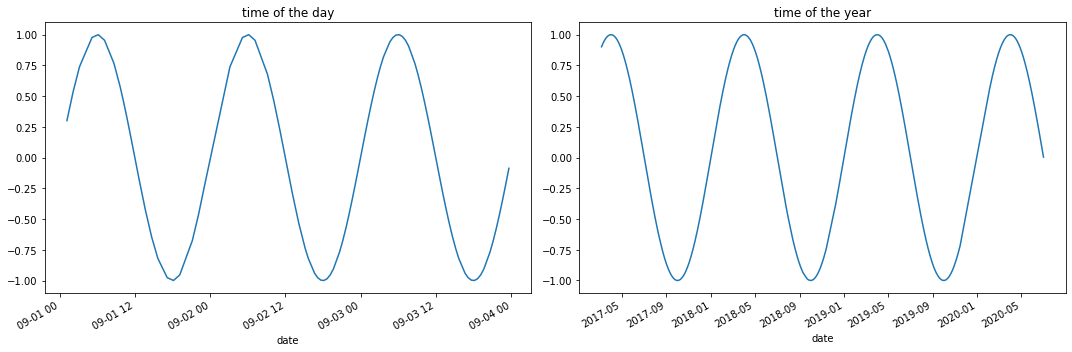

In [ ]:
day_start = '2017-09-01'
day_end = '2017-09-03'
year_start = ion_concentration.index[0]
year_end = ion_concentration.index[-1]

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ion_concentration[day_start : day_end]['time_of_day'].plot(ax=ax1)
ion_concentration[year_start : year_end]['time_of_year'].plot(ax=ax2)
ax1.set_title('time of the day')
ax2.set_title('time of the year')
plt.tight_layout()
plt.show()

### 10 min samples dataset

In [ ]:
# dates casted in float
dates_float = probe_data10min.index.map(pd.Timestamp.timestamp)

# set the two features
probe_data10min['time_of_day'] = np.sin(dates_float * 2 * np.pi / day)
probe_data10min['time_of_year'] = np.sin(dates_float * 2 * np.pi / year)

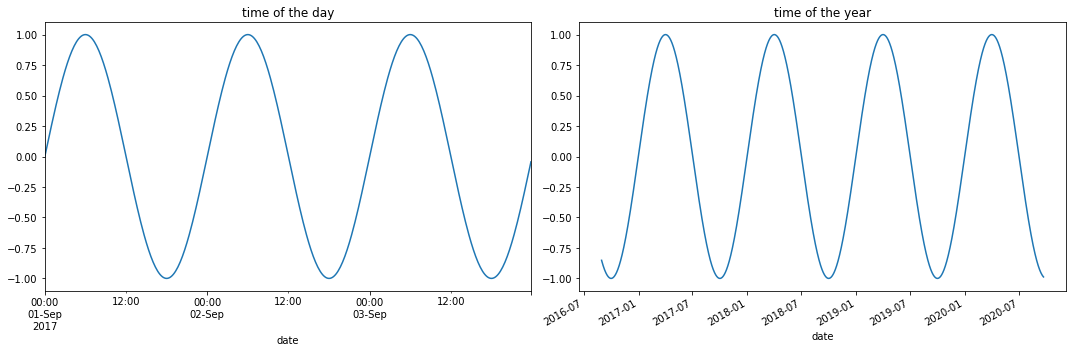

In [ ]:
day_start = '2017-09-01'
day_end = '2017-09-03'
year_start = probe_data10min.index[0]
year_end = probe_data10min.index[-1]

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
probe_data10min[day_start : day_end]['time_of_day'].plot(ax=ax1)
probe_data10min[year_start : year_end]['time_of_year'].plot(ax=ax2)
ax1.set_title('time of the day')
ax2.set_title('time of the year')
plt.tight_layout()
plt.show()

## Standardization 

Machine learning models tend to perform better when the data is in a uniform format. We therefore standardize the data to have zero mean and a standard deviation of 1.

We only standardize the features, i.e. the probe_data10min

In [ ]:
# probe_data10min
probe_data10min = (probe_data10min - probe_data10min.mean())/probe_data10min.std()

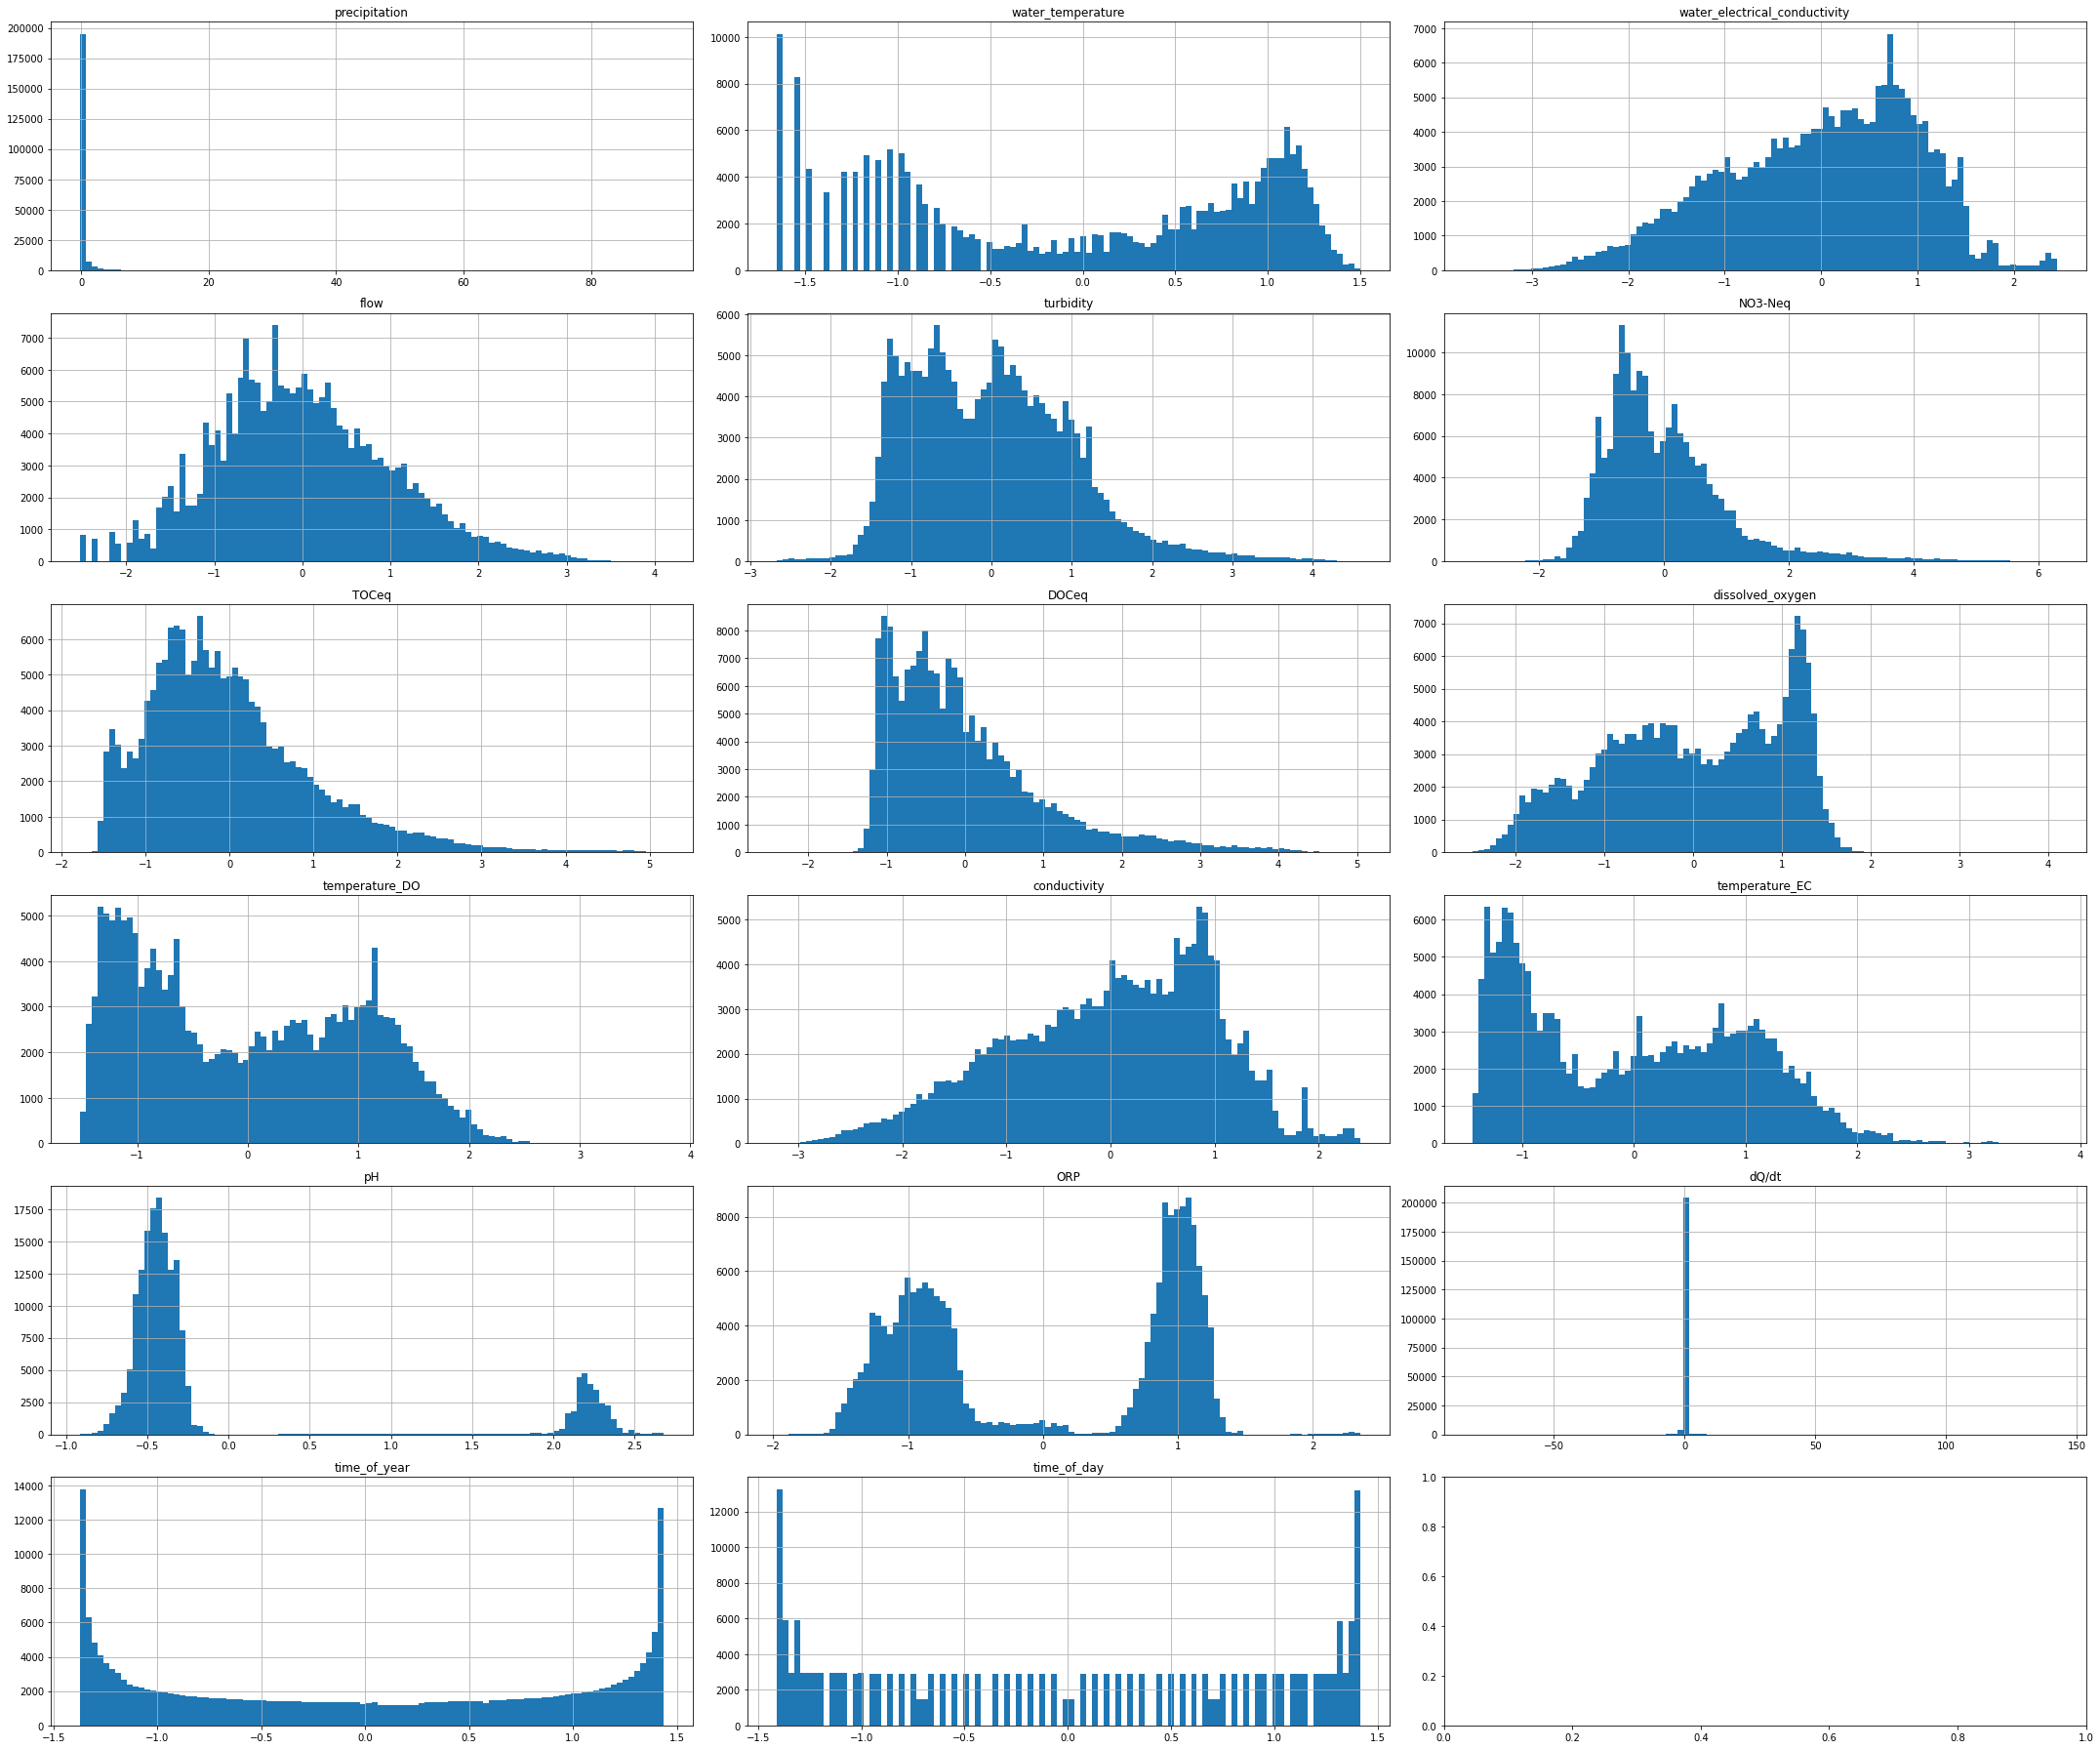

In [ ]:
# plot probe_data10min
plot_distributions(False, probe_10min_cols+['time_of_year', 'time_of_day'])